# D208 - Predictive Modeling - Performance Assessment Task 1
## Joshua T. Funderburk

## Part I: Research Question

### A1. Research Question
The question posed for this analysis is “What factors are related to the length of a hospital stay?” Length of stay has a great impact on hospitals, medical staff, insurance companies, and patients. Hospital and medical staff availability is greatly reduced with long hospital stays. Insurance companies and patients often suffer substantial financial burden from longer stays. Most importantly, patients with longer stays often do not have as great of a patient outcome. By uncovering what factors correlate to the length of a hospital stay, analysis and recommendations can be provided to medical staff to hopefully get ahead of these factors upon initial hospital admittance.

### A2. Objectives and Goals of the Analysis
The objective of this analysis is to gain greater insight to determine what factors directly correlate to the length of a hospital stay. The goal is to use a multiple linear regression model created in Python to determine correlation between length of hospital stay and the available patient demographic and health condition data. The goal for the end result would be to identify weak and strong correlations so that analysis and recommendations may be created for medical staff for use in their decision making.

## Part II: Method Justification

### B1. Assumptions

Multiple linear regression is used to analyze the relationship between two or more independent variables and a single dependent variable. It follows all of the same assumptions as simple linear regression. Here are four assumptions made in multiple linear regression:

- Linearity
    - MLR assumes that there is a linear relationship between the dependent and independent variables. Otherwise stated, any change to the dependent variable must be proportional to the independent variables. Relationships may not be correctly captured if there is no linearity between the variables causing a potentially incorrect prediction model (CFA Institute, 2024).
- No Multicollinearity
  - No multicollinearity means that the independent variables are not highly correlated. Highly correlated independent variables are problematic because it makes it difficult to determine which variable is actually affecting the dependent variable (Dataaspirant, 2023; Statology, 2023).
- Homoscedasticity
    - The residuals of the model should have constant variance across all levels of the independent variables. Reliable hypothesis tests are dependent upon accurate and consistent standard errors. Violating this assumption may result in inaccurate coefficient estimates, unreliable hypothesis tests, and distorted confidence intervals (Statology, 2023).
- Multivariate Normality
    - The residuals should be normally distributed. Normally distributed residuals ensure that the p-values for the t-tests and F-test are valid. Residuals that are not normally distributed can lead to unreliable confidence intervals and hypothesis tests (Statistics Solutions, 2023).

### B2. Benefits of Chosen Tools
Python will be the primary programming language used in this exercise. Python is a very powerful tool for data analysis and machine learning along with many of the libraries that support it. Although many would argue that R is more friendly for statistics, Python is able to accomplish the same functions and is perhaps superior due to its ability to scale models into more complex models. With Python, simple and complex models can be deployed through APIs or integrated into web applications. Additionally, Python has a large community and resources to help with analysis and coding.

Libraries necessary for this project are pandas, which loads, houses, and stores all manipulations of the data; numpy, a powerful mathematics and statistics tool; matplotlib with its flexible visualizations; and statsmodels, a machine learning library that provides tools for implementing and evaluating regression models.

#### Load Python libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import seaborn as sns
import matplotlib.pyplot as plt

### B3. Multiple Linear Regression Technique Justification
Multiple Linear Regression is an appropriate technique for this research as it aims to establish the relationship between a continuous dependent variable (length of hospital stay) and several independent demographic and health condition variables. MLR not only assesses the individual impact of each independent variable on the dependent variable but also captures how the combined influence of multiple factors affects hospital stay length. The MLR approach provides easy to interpret results as each coefficient provides insight into how much a specific factor influences hospital stay length.

## Part III: Data Preparation

### C1. Data Cleaning Goals
Goals:
- Ensure there are non-null values in all relevant columns
- Analyze and update data types where necessary
- Reexpress categorical data as numeric data
- Create consistency in categorical variables
- Update confusing or misleading column names

Steps:
- Ensure there are non-null values in all relevant columns
    - Use the Pandas library .info() function to see a count of non-nulls
    - Use appropriate statistical methodology to fill null columns if necessary
- Analyze and update data types where necessary
    - Use the Pandas library .types function to identify data types
    - Cast zip code as an object rather than an integer as it is truly a categorical variable
    - Convert Area, TimeZone, Marital, Gender, Initial_admin, Complication_risk, and Services columns to a Category data type
- Reexpress categorical data as numeric data
    - Convert boolean columns with values of “Yes” or “No” to be represented numerically by a 1 or a 0
    - Assign numeric values to other categorical data using appropriate techniques dependent upon if the variable is ordinal or nominal data (process: one hot encoding)
- Ensure consistency in categorical variables
    - Group time zones into broader timezone categories that exclude specific physical locations
- Update confusing or misleading column names
    - Rename the 8 “item” columns with a label that represents the definition of each column in the data dictionary


#### Read CSV & Load Data in to Pandas Dataframe

In [2]:
df = pd.read_csv(r'C:\Users\funde\Desktop\WGU\D208\medical_clean.csv',index_col=0)

In [3]:
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Identify columns that do not contain values for all 10000 rows in the data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [5]:
# Analyze data types
dt = df.dtypes
print(dt)

Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety   

In [6]:
# Zip code to object instead of int as it is truly a categorical dimension. Fill to five numbers.
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
print("Zip data type:", df['Zip'].dtype)

Zip data type: object


In [7]:
# List of columns to convert to 'category' data type
columns_convert_to_category = [
    "Area", "TimeZone", "Marital", "Gender",
    "Initial_admin", "Complication_risk", "Services"
]

# Convert specified columns to 'category' data type
df[columns_convert_to_category] = df[columns_convert_to_category].astype("category")

# Print the data types of the specified columns
print(df[columns_convert_to_category].dtypes)

Area                 category
TimeZone             category
Marital              category
Gender               category
Initial_admin        category
Complication_risk    category
Services             category
dtype: object


In [8]:
# Create the timezone mapping dictionary
timezone_mapping = {
    # Alaska Time (AKT)
    'America/Anchorage': 'Alaska Time (AKT)',
    'America/Nome': 'Alaska Time (AKT)',
    'America/Sitka': 'Alaska Time (AKT)',
    'America/Yakutat': 'Alaska Time (AKT)',
    # Atlantic Time (AT)
    'America/Puerto_Rico': 'Atlantic Time (AT)',
    # Central Time (CT)
    'America/Chicago': 'Central Time (CT)',
    'America/Menominee': 'Central Time (CT)',
    'America/North_Dakota/Beulah': 'Central Time (CT)',
    'America/North_Dakota/New_Salem': 'Central Time (CT)',
    # Eastern Time (ET)
    'America/Detroit': 'Eastern Time (ET)',
    'America/Indiana/Indianapolis': 'Eastern Time (ET)',
    'America/Indiana/Knox': 'Eastern Time (ET)',
    'America/Indiana/Marengo': 'Eastern Time (ET)',
    'America/Indiana/Tell_City': 'Eastern Time (ET)',
    'America/Indiana/Vevay': 'Eastern Time (ET)',
    'America/Indiana/Vincennes': 'Eastern Time (ET)',
    'America/Indiana/Winamac': 'Eastern Time (ET)',
    'America/Kentucky/Louisville': 'Eastern Time (ET)',
    'America/New_York': 'Eastern Time (ET)',
    'America/Toronto': 'Eastern Time (ET)',
    # Hawaii-Aleutian Time (HAT)
    'America/Adak': 'Hawaii-Aleutian Time (HAT)',
    'Pacific/Honolulu': 'Hawaii-Aleutian Time (HAT) - No DST',
    # Mountain Time (MT) with DST
    'America/Boise': 'Mountain Time (MT)',
    'America/Denver': 'Mountain Time (MT)',
    # Mountain Time (MST) without DST
    'America/Phoenix': 'Mountain Standard Time (MST) - No DST',
    # Pacific Time (PT)
    'America/Los_Angeles': 'Pacific Time (PT)',
}

# Create new categories (unique values that will be in the mapped data)
new_categories = sorted(set(timezone_mapping.values()))

# Create new categorical type
new_dtype = pd.CategoricalDtype(categories=new_categories, ordered=False)

# Map the values and convert to the new categorical type
df['TimeZone'] = df['TimeZone'].map(timezone_mapping).astype(new_dtype)

# Print the results
print("\nNew timezone categories:")
print(df['TimeZone'].cat.categories.tolist())
print("\nValue counts:")
print(df.TimeZone.value_counts())


New timezone categories:
['Alaska Time (AKT)', 'Atlantic Time (AT)', 'Central Time (CT)', 'Eastern Time (ET)', 'Hawaii-Aleutian Time (HAT)', 'Hawaii-Aleutian Time (HAT) - No DST', 'Mountain Standard Time (MST) - No DST', 'Mountain Time (MT)', 'Pacific Time (PT)']

Value counts:
TimeZone
Eastern Time (ET)                        4330
Central Time (CT)                        3788
Pacific Time (PT)                         937
Mountain Time (MT)                        698
Mountain Standard Time (MST) - No DST     100
Alaska Time (AKT)                          69
Atlantic Time (AT)                         43
Hawaii-Aleutian Time (HAT) - No DST        34
Hawaii-Aleutian Time (HAT)                  1
Name: count, dtype: int64


In [9]:
# List of boolean columns
yes_no_columns = [
    "Soft_drink", "HighBlood", "Stroke", "Overweight", "Arthritis",
    "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis",
    "Reflux_esophagitis", "Asthma"
]

# Create mapping dictionary
mapping = {'Yes': 1, 'No': 0}

# Apply mapping and convert to int
for col in yes_no_columns:
    df[col] = df[col].map(mapping).astype(int)

# Verify the conversion
print("\nData Types:")
print(df[yes_no_columns].dtypes)
print("\nFirst Few Rows:")
print(df[yes_no_columns].head())


Data Types:
Soft_drink            int32
HighBlood             int32
Stroke                int32
Overweight            int32
Arthritis             int32
Diabetes              int32
Hyperlipidemia        int32
BackPain              int32
Anxiety               int32
Allergic_rhinitis     int32
Reflux_esophagitis    int32
Asthma                int32
dtype: object

First Few Rows:
           Soft_drink  HighBlood  Stroke  Overweight  Arthritis  Diabetes  \
CaseOrder                                                                   
1                   0          1       0           0          1         1   
2                   0          1       0           1          0         0   
3                   0          1       0           1          0         1   
4                   0          0       1           0          1         0   
5                   1          0       0           0          0         0   

           Hyperlipidemia  BackPain  Anxiety  Allergic_rhinitis  \
CaseOrder    

In [10]:
#Rename survey columns to better match the data definition
df.rename(columns={'Item1':'Survey_Timely_Admission',
                     'Item2':'Survey_Timely_Treatment',
                     'Item3':'Survey_Timely_Visit',
                     'Item4':'Survey_Reliability',
                     'Item5':'Survey_Options',
                     'Item6':'Survey_Hours_of_Treatment',
                     'Item7':'Survey_Courteous_Staff',
                     'Item8':'Survey_Doctor_Active_Listening',
                    },
            inplace=True
            )

# Confirm column names have been updated
print(df.columns[-8:])

Index(['Survey_Timely_Admission', 'Survey_Timely_Treatment',
       'Survey_Timely_Visit', 'Survey_Reliability', 'Survey_Options',
       'Survey_Hours_of_Treatment', 'Survey_Courteous_Staff',
       'Survey_Doctor_Active_Listening'],
      dtype='object')


### C2. Summary Statistics

Summary statistics will be performed on the initial_days variable as the dependent variable. The following variables will be considered independent variables for this model: Age, Allergic_rhinitis, Arthritis, Asthma, BackPain, Children, Complication_risk, Diabetes, Doc_visits, Gender, HighBlood, Hyperlipidemia, Income, Initial_admin, Overweight, Reflux_esophagitis, Soft_drink, Stroke, vitD_supp, and VitD_levels.

#### Initial days
The sample in this dataset shows a fairly broad range of days spent in the hospital on the initial stay, with a minimum of 1 day and a maximum of almost 72 days. The mean shows initial stay length of 35.5 days - over a month long. The summary statistics for this variable exemplify that there is a problem that needs to be solved and a goal of identifying factors to predict hospital stay length to ultimately reduce stay length is completely appropriate.

In [11]:
# Describe Initial_days (Dependent Variable)
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

To check for outliers, the intial day values are grouped in to bins of 5. Although most values seem to be on either the extreme of low stay length or high stay length, there do not seem to be any outliers that would skew the results of analysis or modeling.

Source: [Python - Creating Bins (bucketing)](https://www.youtube.com/watch?app=desktop&v=I83PNH0JRMA) 

In [12]:
# Check Initial_days for outliers by binning the results by 5 days and analyzing

# Define the bin range
max_value = df['Initial_days'].max()
bins = np.arange(0, max_value + 5, 5)

# Create bucket labels
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Use pd.cut to categorize the data and value_counts to get the count of each bucket
bucket_counts = pd.cut(df['Initial_days'], bins=bins, labels=labels, right=False).value_counts()

# Sort the output by the bucket labels
sorted_bucket_counts = bucket_counts.sort_index()

print(sorted_bucket_counts)

Initial_days
0.0-4.0      1486
5.0-9.0      1605
10.0-14.0    1015
15.0-19.0     571
20.0-24.0     234
25.0-29.0      68
30.0-34.0      19
35.0-39.0     116
40.0-44.0     249
45.0-49.0     401
50.0-54.0     668
55.0-59.0     870
60.0-64.0    1030
65.0-69.0    1195
70.0-74.0     473
Name: count, dtype: int64


#### Age
It is interesting to note with the age variable that the minimum patient age in the dataset is 18 years old. The sample dataset essentially constrains us to building a model that can draw correlations with length of hospital stay for adult patients. 

In [13]:
# Age - Independent Variable
print("Age Summary Statistics:")
df.Age.describe()

Age Summary Statistics:


count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

#### Allergic Rhinitis
Roughly 39% of the patients suffer from allergic rhinitis.

In [14]:
# Allergic_rhinitis - Independent Variable
print("Allergic Rhinitis Summary Statistics:")
df.Allergic_rhinitis.value_counts()

Allergic Rhinitis Summary Statistics:


Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64

#### Arthritis
Roughly 36% of the patients suffer from arthritis.

In [15]:
# Arthritis - Independent Variable
print("Arthritis Summary Statistics:")
df.Arthritis.value_counts()

Arthritis Summary Statistics:


Arthritis
0    6426
1    3574
Name: count, dtype: int64

#### Asthma
Only 28.9% of the patients suffer from asthma.

In [16]:
# Asthma - Independent Variable
print("Asthma Summary Statistics:")
df.Asthma.value_counts()

Asthma Summary Statistics:


Asthma
0    7107
1    2893
Name: count, dtype: int64

#### Back Pain
41.1% of the patients suffer from back pain.

In [17]:
# Back Pain - Independent Variable
print("Back Pain Summary Statistics:")
df.BackPain.value_counts()

Back Pain Summary Statistics:


BackPain
0    5886
1    4114
Name: count, dtype: int64

#### Children
The number of children the patients in the dataset have heavily favors less children - especially between 0 and 3. 25.5% of patients do not have any children.

In [18]:
# Children - Independent Variable
print("Children Summary Statistics:")
df.Children.value_counts().sort_index()

Children Summary Statistics:


Children
0     2548
1     2509
2     1475
3     1489
4      995
5      169
6      191
7      213
8      209
9      108
10      94
Name: count, dtype: int64

#### Complication Risk
The counts of complication risk are fairly distributed between low, medium, and high. Over 80% of patients have a complication risk of medium or high, which may be common sense being that these individuals are hospitalized.

In [19]:
# Complication_risk - Independent Variable
print("Complication Risk Summary Statistics:")
df.Complication_risk.value_counts()

Complication Risk Summary Statistics:


Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

#### Diabetes
Most patients do not have diabetes - only 27% do.

In [20]:
# Diabetes - Independent Variable
print("Diabetes Summary Statistics:")
df.Diabetes.value_counts()

Diabetes Summary Statistics:


Diabetes
0    7262
1    2738
Name: count, dtype: int64

#### Doc Visits
While there are some small outliers in 1 doctor visit and 9 doctor visits, the entire dataset has a very even distribution rendering it unncessary to consider removal of outliers.

In [21]:
# Doc_visits - Independent Variable
print("Doctor Visits Summary Statistics:")
df.Doc_visits.value_counts().sort_index()

Doctor Visits Summary Statistics:


Doc_visits
1       6
2      58
3     595
4    2385
5    3823
6    2436
7     634
8      61
9       2
Name: count, dtype: int64

#### Gender
The split between Male and Female is close, with only 214 identifying as Nonbinary.

In [22]:
# Gender - Independent Variable
print("Gender Summary Statistics:")
df.Gender.value_counts()

Gender Summary Statistics:


Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

#### High Blood
40% of patients have high blood pressure.

In [23]:
# HighBlood - Independent Variable
print("High Blood Pressure Summary Statistics:")
df.HighBlood.value_counts()

High Blood Pressure Summary Statistics:


HighBlood
0    5910
1    4090
Name: count, dtype: int64

#### Hyperlipidemia
33.7% of patients have Hyperlipidemia.

In [24]:
# Hyperlipidemia - Independent Variable
print("Hyperlipidemia Summary Statistics:")
df.Hyperlipidemia.value_counts()

Hyperlipidemia Summary Statistics:


Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64

#### Income
Income is an interesting variable in this analysis given it is the furthest away from being a medical condition or a biological trait. This variable operates on a hypothesis that the higher the income, the longer the stay simply because the patients can afford it. The model will determine if that is true.

The max value of income in the summary statistics seems to be a far outliers from the mean or even from the 75th percentile. Upon checking the 10 smallest and largest incomes, it does seem that there is not a single or a handful of variables that are true outliers. The distribution leans left, but the values do not indicate a need for outlier removal.

In [25]:
# Income - Independent Variable
print("Income Summary Statistics:")
df.Income.describe()

Income Summary Statistics:


count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [26]:
# Check smallest and largest incomes for outliers
print("10 smallest incomes:")
print(df.Income.nsmallest(n=10))

print("10 largest incomes:")
print(df.Income.nlargest(n=10))

10 smallest incomes:
CaseOrder
822     154.08
9809    300.79
288     395.23
111     401.86
8659    493.04
9129    695.22
5894    702.16
3484    798.98
1216    826.01
6300    881.07
Name: Income, dtype: float64
10 largest incomes:
CaseOrder
8387    207249.10
842     204542.41
8599    203774.60
6407    197675.00
1779    197576.18
7493    196915.60
4332    194796.24
7245    190110.80
4408    189416.27
3074    189129.92
Name: Income, dtype: float64


#### Initial Admin
Emergency admissions account for slightly over 50% of all admissions with elective and observation admissions accounting for 25% each.

In [27]:
# Initial_admin - Independent Variable
print("Initial Admin Summary Statistics:")
df.Initial_admin.value_counts()

Initial Admin Summary Statistics:


Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

#### Overweight
70% of patients in the dataset are considered overweight. This may be an indicator of a person's likelihood to be hospitalized, but it is yet to be seen whether being overweight also can inform the length of stay.

In [28]:
# Overweight - Independent Variable
print("Overweight Summary Statistics:")
df.Overweight.value_counts()

Overweight Summary Statistics:


Overweight
1    7094
0    2906
Name: count, dtype: int64

#### Reflux Esophagitis
41.4% of patients suffer from reflux esophagitis.

In [29]:
# Reflux_esophagitis - Independent Variable
print("Reflux Esophagitis Summary Statistics:")
df.Reflux_esophagitis.value_counts()

Reflux Esophagitis Summary Statistics:


Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64

#### Soft Drink
Only 25% of the patients state they drink soft drinks.

In [30]:
# Soft_drink - Independent Variable
print("Soft Drink Summary Statistics:")
df.Soft_drink.value_counts()

Soft Drink Summary Statistics:


Soft_drink
0    7425
1    2575
Name: count, dtype: int64

#### Stroke
Only 1 in 5 patients are identified as having had a stroke.

In [31]:
# Stroke - Independent Variable
print("Stroke Summary Statistics:")
df.Stroke.value_counts()

Stroke Summary Statistics:


Stroke
0    8007
1    1993
Name: count, dtype: int64

#### Vitamin D Supp
The overwhelming majority of patients have 0 or 1 vitamin d supplements.

In [32]:
# vitD_supp - Independent Variable
print("Vitamin D Supplement Summary Statistics:")
df.vitD_supp.value_counts()

Vitamin D Supplement Summary Statistics:


vitD_supp
0    6702
1    2684
2     544
3      64
4       5
5       1
Name: count, dtype: int64

#### Vitamin D Levels
Mean Vit D Level about 18 with small standard deviations away from the mean.

In [33]:
# VitD_levels - Independent Variable
print("Vitamin D Levels Summary Statistics:")
df.VitD_levels.describe()

Vitamin D Levels Summary Statistics:


count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

### C3.  Univariate and Bivariate Visualizations

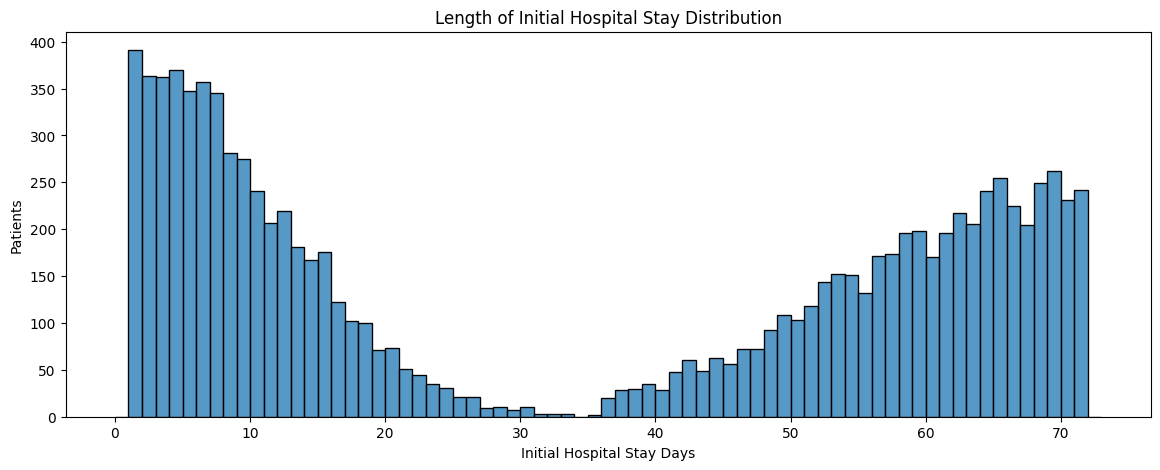

In [34]:
# Days hospitalized

# Set chart size
plt.figure(figsize=(14, 5))

# Days hospitalized
bins = np.arange(0, 74, 1)
sns.histplot(df['Initial_days'], bins=bins)

# Chart features
plt.title('Length of Initial Hospital Stay Distribution')
plt.xlabel('Initial Hospital Stay Days')
plt.ylabel('Patients')
plt.show()

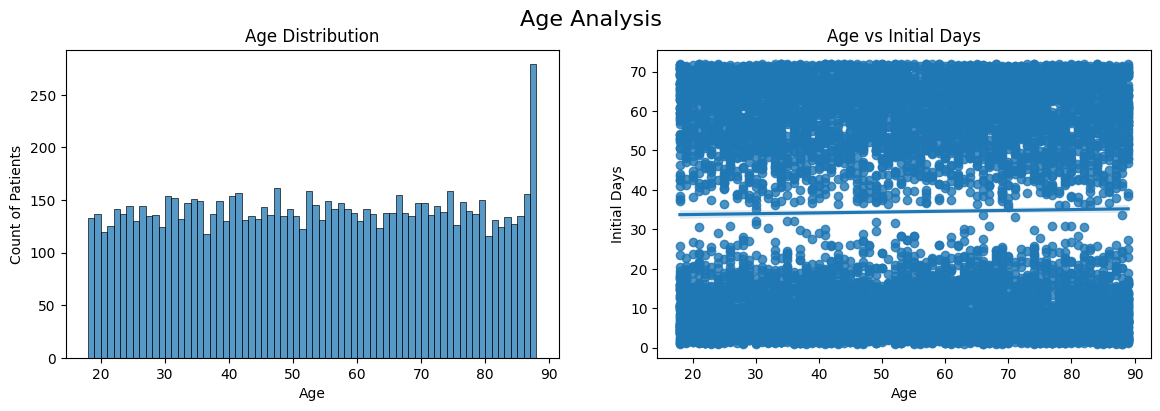

In [35]:
# Age

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

## Univariate Analysis ##
min_age = df.Age.min()
max_age = df.Age.max()
bins = np.arange(min_age, max_age, 1)
sns.histplot(df['Age'], bins=bins, ax=axs[0])

# Chart features for Age distribution
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count of Patients')

## Bivariate Analysis ##
sns.regplot(data=df, x='Age', y='Initial_days', ax=axs[1])

# Chart features for Age vs Initial_days
axs[1].set_title('Age vs Initial Days')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Age Analysis', fontsize=16)

# Adjust layout with more padding
plt.subplots_adjust(wspace=0.2) 

# Show the plots
plt.show()

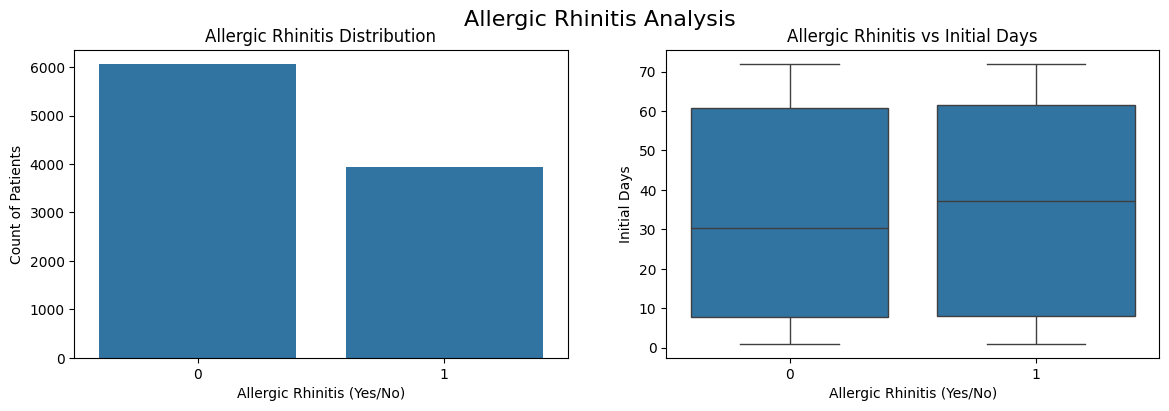

In [36]:
# Allergic Rhinitis

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Allergic Rhinitis
sns.countplot(x='Allergic_rhinitis', data=df, ax=axs[0])

# Chart features for Allergic Rhinitis distribution
axs[0].set_title('Allergic Rhinitis Distribution')
axs[0].set_xlabel('Allergic Rhinitis (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Allergic Rhinitis vs Initial Days
sns.boxplot(x='Allergic_rhinitis', y='Initial_days', data=df, ax=axs[1])

# Chart features for Allergic Rhinitis vs Initial_days
axs[1].set_title('Allergic Rhinitis vs Initial Days')
axs[1].set_xlabel('Allergic Rhinitis (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Allergic Rhinitis Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

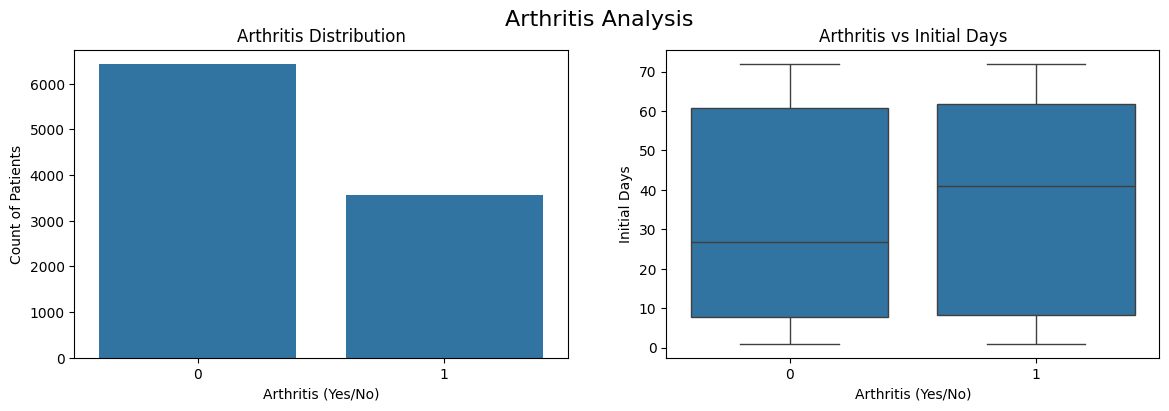

In [37]:
# Arthritis

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Arthritis
sns.countplot(x='Arthritis', data=df, ax=axs[0])

# Chart features for Arthritis distribution
axs[0].set_title('Arthritis Distribution')
axs[0].set_xlabel('Arthritis (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Arthritis vs Initial Days
sns.boxplot(x='Arthritis', y='Initial_days', data=df, ax=axs[1])

# Chart features for Arthritis vs Initial_days
axs[1].set_title('Arthritis vs Initial Days')
axs[1].set_xlabel('Arthritis (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Arthritis Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

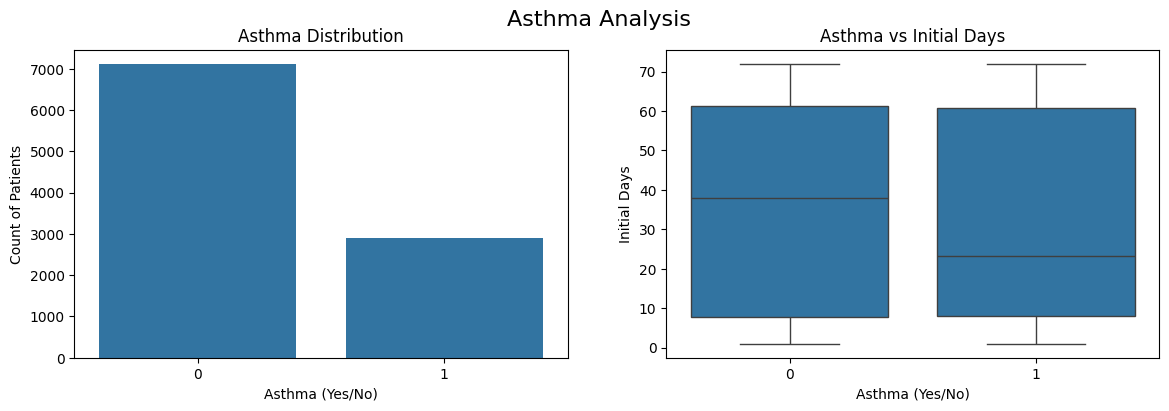

In [38]:
# Asthma

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Asthma
sns.countplot(x='Asthma', data=df, ax=axs[0])

# Chart features for Asthma distribution
axs[0].set_title('Asthma Distribution')
axs[0].set_xlabel('Asthma (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Asthma vs Initial Days
sns.boxplot(x='Asthma', y='Initial_days', data=df, ax=axs[1])

# Chart features for Asthma vs Initial_days
axs[1].set_title('Asthma vs Initial Days')
axs[1].set_xlabel('Asthma (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Asthma Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

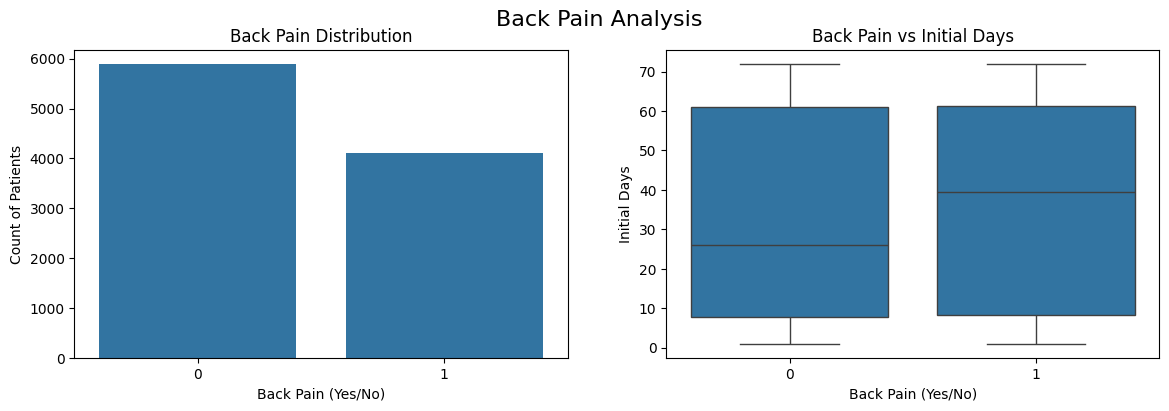

In [39]:
# Back Pain

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Back Pain
sns.countplot(x='BackPain', data=df, ax=axs[0])

# Chart features for Back Pain distribution
axs[0].set_title('Back Pain Distribution')
axs[0].set_xlabel('Back Pain (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Back Pain vs Initial Days
sns.boxplot(x='BackPain', y='Initial_days', data=df, ax=axs[1])

# Chart features for Back Pain vs Initial_days
axs[1].set_title('Back Pain vs Initial Days')
axs[1].set_xlabel('Back Pain (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Back Pain Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

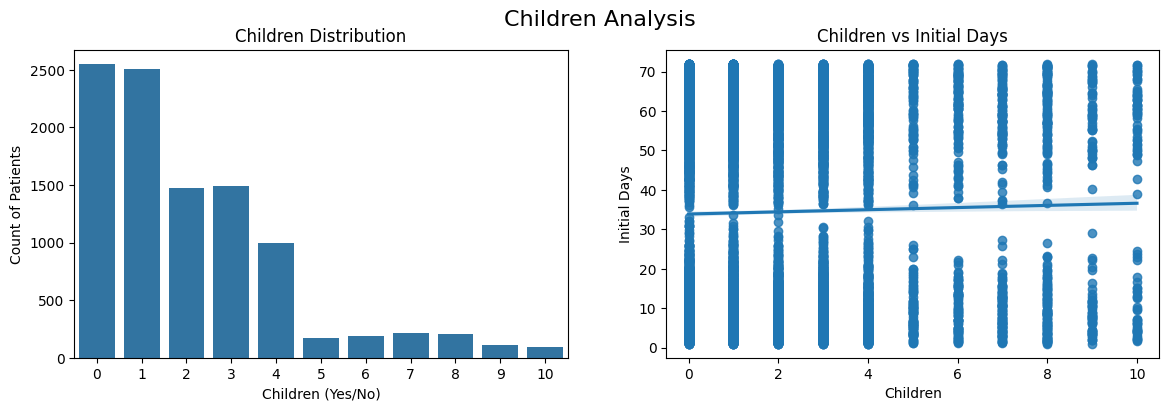

In [40]:
# Children

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Children
sns.countplot(x='Children', data=df, ax=axs[0])

# Chart features for Children distribution
axs[0].set_title('Children Distribution')
axs[0].set_xlabel('Children (Yes/No)')
axs[0].set_ylabel('Count of Patients')

## Bivariate Analysis ##
sns.regplot(data=df, x='Children', y='Initial_days', ax=axs[1])

# Chart features for Age vs Initial_days
axs[1].set_title('Children vs Initial Days')
axs[1].set_xlabel('Children')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Children Analysis', fontsize=16)

# Adjust layout with more padding
plt.subplots_adjust(wspace=0.2) 

# Show the plots
plt.show()

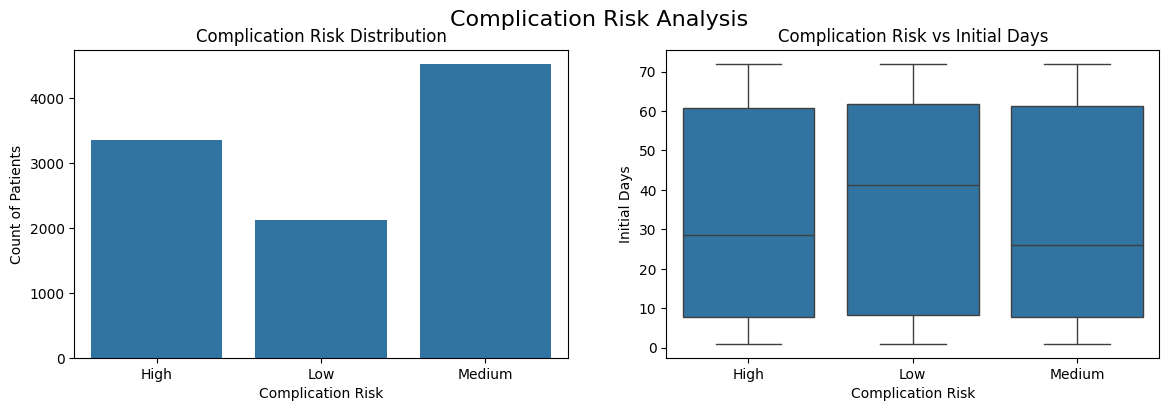

In [41]:
# Complication Risk

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Complication Risk
sns.countplot(x='Complication_risk', data=df, ax=axs[0])

# Chart features for Complication Risk distribution
axs[0].set_title('Complication Risk Distribution')
axs[0].set_xlabel('Complication Risk')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Back Pain vs Initial Days
sns.boxplot(x='Complication_risk', y='Initial_days', data=df, ax=axs[1])

# Chart features for Back Pain vs Initial_days
axs[1].set_title('Complication Risk vs Initial Days')
axs[1].set_xlabel('Complication Risk')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Complication Risk Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

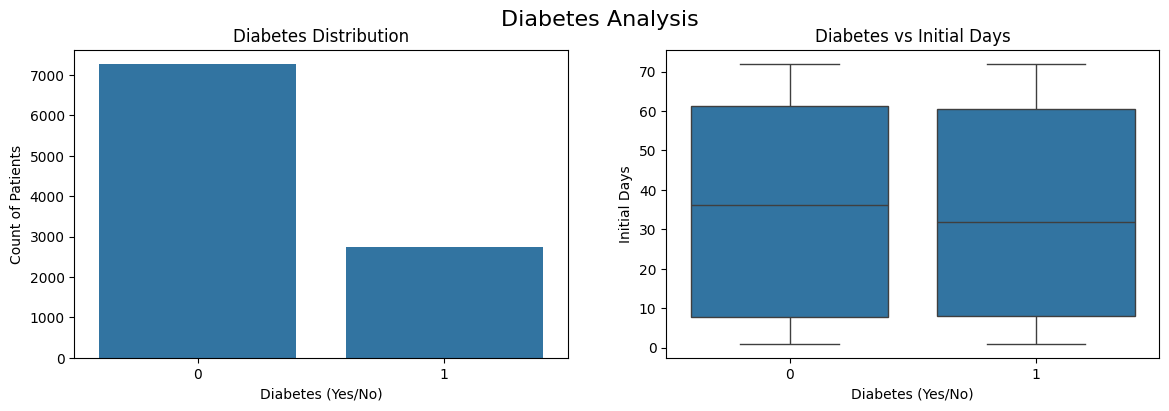

In [42]:
# Diabetes

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Diabetes
sns.countplot(x='Diabetes', data=df, ax=axs[0])

# Chart features for Diabetes distribution
axs[0].set_title('Diabetes Distribution')
axs[0].set_xlabel('Diabetes (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Diabetes vs Initial Days
sns.boxplot(x='Diabetes', y='Initial_days', data=df, ax=axs[1])

# Chart features for Diabetes vs Initial_days
axs[1].set_title('Diabetes vs Initial Days')
axs[1].set_xlabel('Diabetes (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Diabetes Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

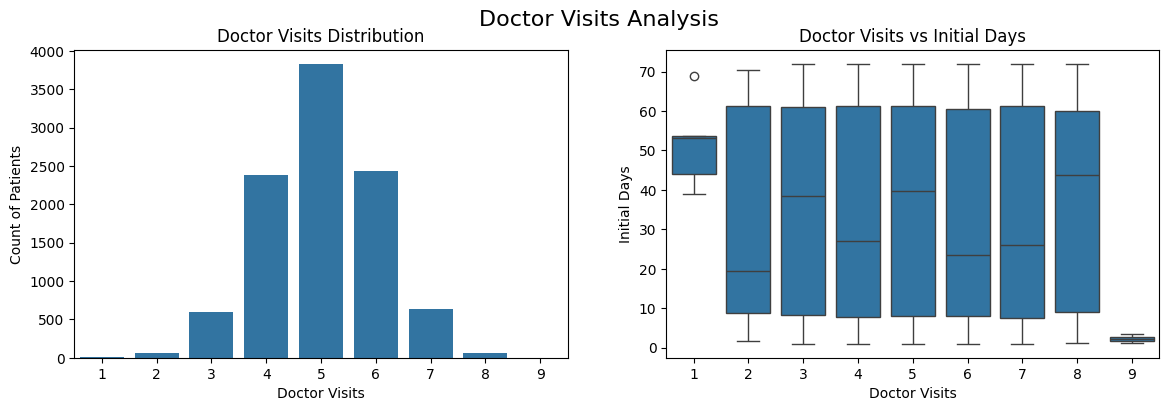

In [43]:
# Doctor Visits

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Doctor Visits
sns.countplot(x='Doc_visits', data=df, ax=axs[0])

# Chart features for Doctor Visits distribution
axs[0].set_title('Doctor Visits Distribution')
axs[0].set_xlabel('Doctor Visits')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Doctor Visits vs Initial Days
sns.boxplot(x='Doc_visits', y='Initial_days', data=df, ax=axs[1])

# Chart features for Doctor Visits vs Initial_days
axs[1].set_title('Doctor Visits vs Initial Days')
axs[1].set_xlabel('Doctor Visits')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Doctor Visits Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

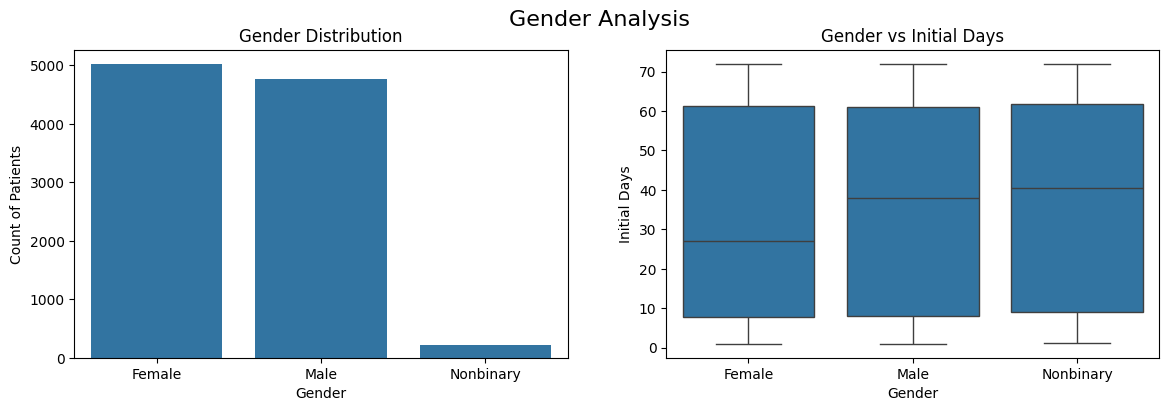

In [44]:
# Gender

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Gender
sns.countplot(x='Gender', data=df, ax=axs[0])

# Chart features for Gender distribution
axs[0].set_title('Gender Distribution')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Gender vs Initial Days
sns.boxplot(x='Gender', y='Initial_days', data=df, ax=axs[1])

# Chart features for Gender vs Initial_days
axs[1].set_title('Gender vs Initial Days')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Gender Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

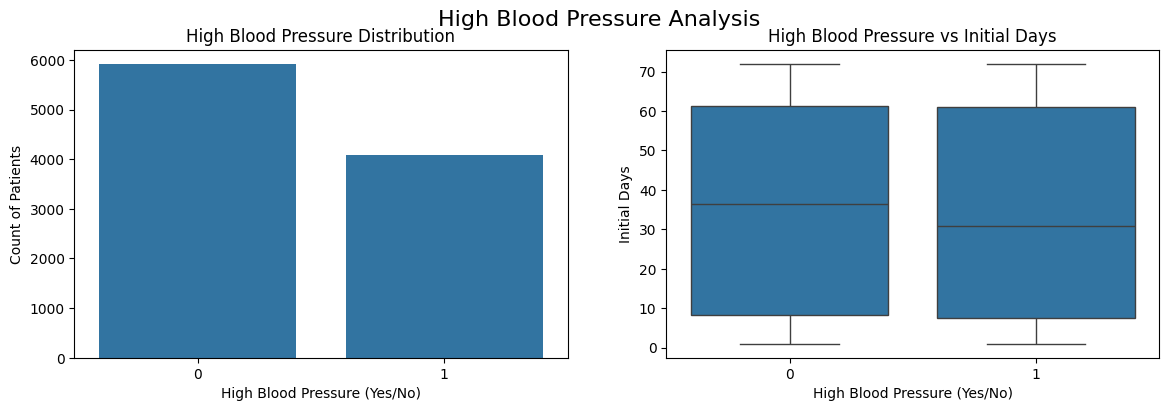

In [45]:
# High Blood

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for High Blood Pressure
sns.countplot(x='HighBlood', data=df, ax=axs[0])

# Chart features for High Blood Pressure distribution
axs[0].set_title('High Blood Pressure Distribution')
axs[0].set_xlabel('High Blood Pressure (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: High Blood Pressure vs Initial Days
sns.boxplot(x='HighBlood', y='Initial_days', data=df, ax=axs[1])

# Chart features for High Blood Pressure vs Initial_days
axs[1].set_title('High Blood Pressure vs Initial Days')
axs[1].set_xlabel('High Blood Pressure (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('High Blood Pressure Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

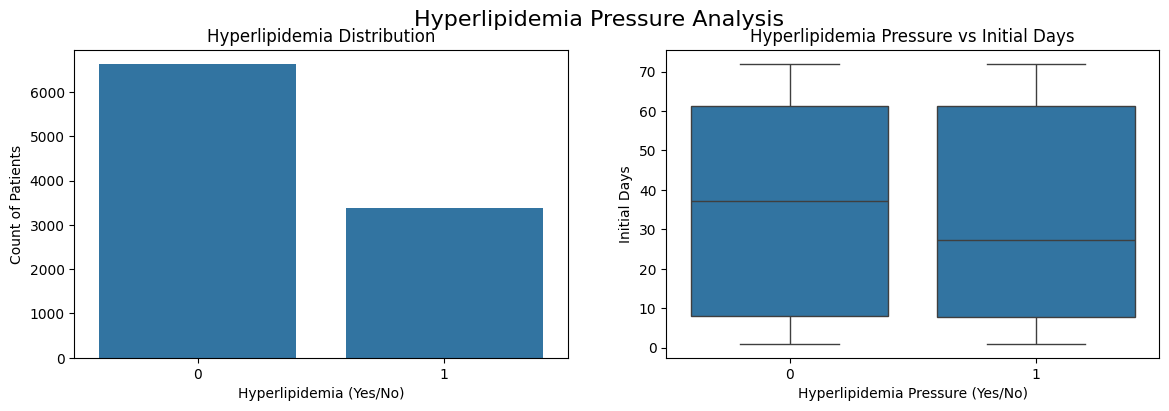

In [46]:
# Hyperlipidemia

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Hyperlipidemia
sns.countplot(x='Hyperlipidemia', data=df, ax=axs[0])

# Chart features for Hyperlipidemia distribution
axs[0].set_title('Hyperlipidemia Distribution')
axs[0].set_xlabel('Hyperlipidemia (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: High Blood Pressure vs Initial Days
sns.boxplot(x='Hyperlipidemia', y='Initial_days', data=df, ax=axs[1])

# Chart features for Hyperlipidemia Pressure vs Initial_days
axs[1].set_title('Hyperlipidemia Pressure vs Initial Days')
axs[1].set_xlabel('Hyperlipidemia Pressure (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Hyperlipidemia Pressure Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

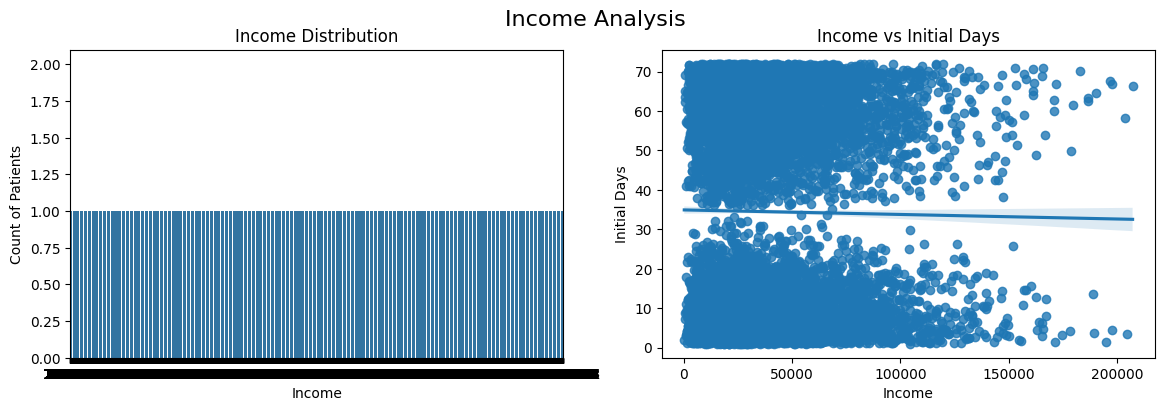

In [47]:
# Income

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Income
sns.countplot(x='Income', data=df, ax=axs[0])

# Chart features for Income distribution
axs[0].set_title('Income Distribution')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Count of Patients')

## Bivariate Analysis ##
sns.regplot(data=df, x='Income', y='Initial_days', ax=axs[1])

# Chart features for Income vs Initial_days
axs[1].set_title('Income vs Initial Days')
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Income Analysis', fontsize=16)

# Adjust layout with more padding
plt.subplots_adjust(wspace=0.2) 

# Show the plots
plt.show()

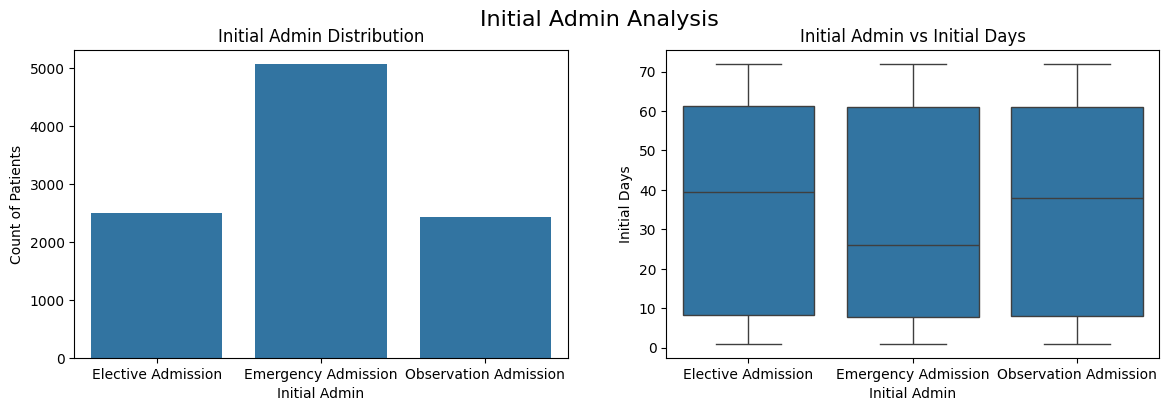

In [48]:
# Initial Admin

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Initial Admin
sns.countplot(x='Initial_admin', data=df, ax=axs[0])

# Chart features for Initial Admin distribution
axs[0].set_title('Initial Admin Distribution')
axs[0].set_xlabel('Initial Admin')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Initial Admin vs Initial Days
sns.boxplot(x='Initial_admin', y='Initial_days', data=df, ax=axs[1])

# Chart features for Initial Admin vs Initial_days
axs[1].set_title('Initial Admin vs Initial Days')
axs[1].set_xlabel('Initial Admin')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Initial Admin Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

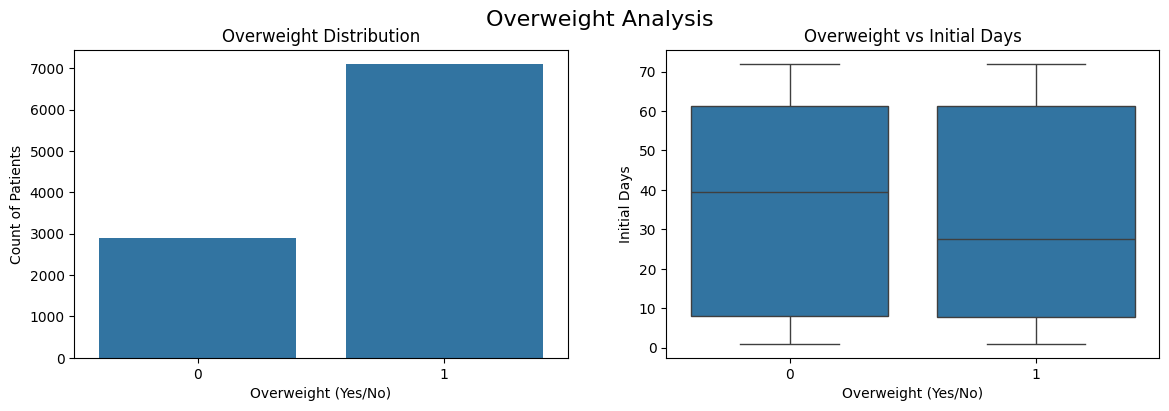

In [49]:
# Overweight

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Overweight
sns.countplot(x='Overweight', data=df, ax=axs[0])

# Chart features for Overweight distribution
axs[0].set_title('Overweight Distribution')
axs[0].set_xlabel('Overweight (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Overweight vs Initial Days
sns.boxplot(x='Overweight', y='Initial_days', data=df, ax=axs[1])

# Chart features for Overweight vs Initial_days
axs[1].set_title('Overweight vs Initial Days')
axs[1].set_xlabel('Overweight (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Overweight Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

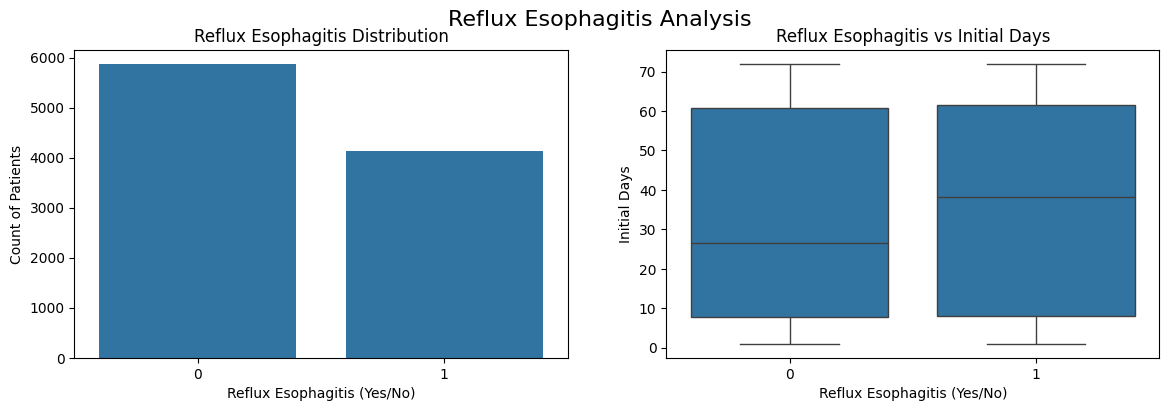

In [50]:
# Reflux Esophagitis

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Reflux Esophagitis
sns.countplot(x='Reflux_esophagitis', data=df, ax=axs[0])

# Chart features for Reflux Esophagitis distribution
axs[0].set_title('Reflux Esophagitis Distribution')
axs[0].set_xlabel('Reflux Esophagitis (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Reflux Esophagitis vs Initial Days
sns.boxplot(x='Reflux_esophagitis', y='Initial_days', data=df, ax=axs[1])

# Chart features for Reflux Esophagitis vs Initial_days
axs[1].set_title('Reflux Esophagitis vs Initial Days')
axs[1].set_xlabel('Reflux Esophagitis (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Reflux Esophagitis Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

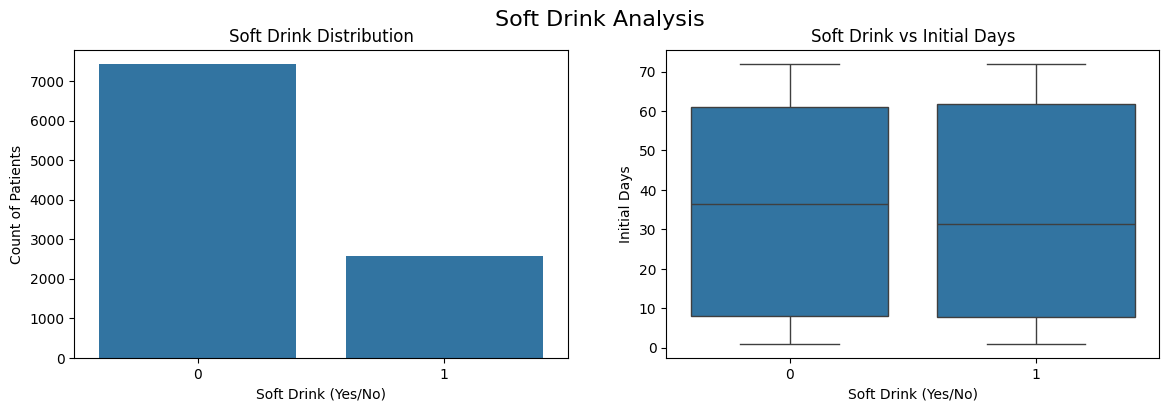

In [51]:
# Soft Drink

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Soft Drink
sns.countplot(x='Soft_drink', data=df, ax=axs[0])

# Chart features for Soft Drink distribution
axs[0].set_title('Soft Drink Distribution')
axs[0].set_xlabel('Soft Drink (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Soft Drink vs Initial Days
sns.boxplot(x='Soft_drink', y='Initial_days', data=df, ax=axs[1])

# Chart features for Soft Drink vs Initial_days
axs[1].set_title('Soft Drink vs Initial Days')
axs[1].set_xlabel('Soft Drink (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Soft Drink Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

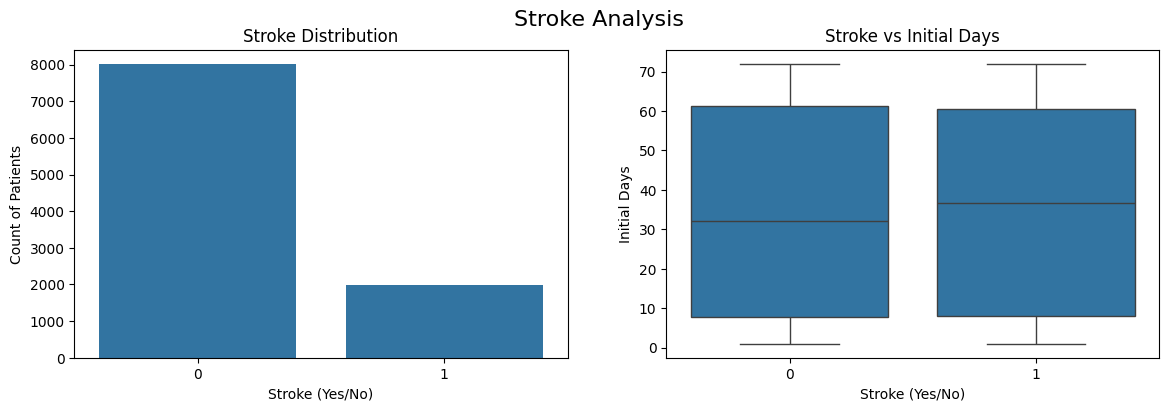

In [52]:
# Stroke

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Stroke
sns.countplot(x='Stroke', data=df, ax=axs[0])

# Chart features for Stroke distribution
axs[0].set_title('Stroke Distribution')
axs[0].set_xlabel('Stroke (Yes/No)')
axs[0].set_ylabel('Count of Patients')

# Bivariate Visualization: Stroke vs Initial Days
sns.boxplot(x='Stroke', y='Initial_days', data=df, ax=axs[1])

# Chart features for Stroke vs Initial_days
axs[1].set_title('Stroke vs Initial Days')
axs[1].set_xlabel('Stroke (Yes/No)')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Stroke Analysis', fontsize=16)

# Adjust layout
plt.subplots_adjust(wspace=0.2)

# Show the plots
plt.show()

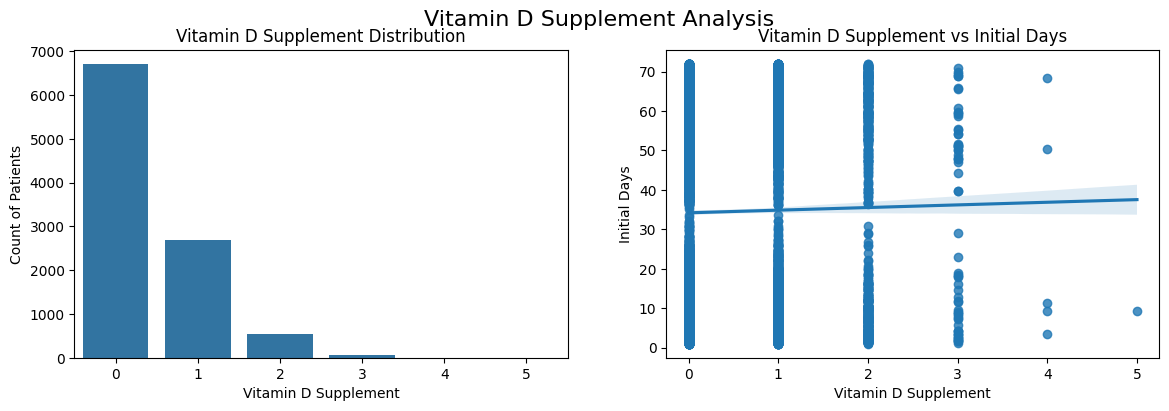

In [53]:
# Vitamin D Supplement

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Vitamin D Supplement
sns.countplot(x='vitD_supp', data=df, ax=axs[0])

# Chart features for Vitamin D Supplement distribution
axs[0].set_title('Vitamin D Supplement Distribution')
axs[0].set_xlabel('Vitamin D Supplement')
axs[0].set_ylabel('Count of Patients')

## Bivariate Analysis ##
sns.regplot(data=df, x='vitD_supp', y='Initial_days', ax=axs[1])

# Chart features for Vitamin D Supplement vs Initial_days
axs[1].set_title('Vitamin D Supplement vs Initial Days')
axs[1].set_xlabel('Vitamin D Supplement')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Vitamin D Supplement Analysis', fontsize=16)

# Adjust layout with more padding
plt.subplots_adjust(wspace=0.2) 

# Show the plots
plt.show()

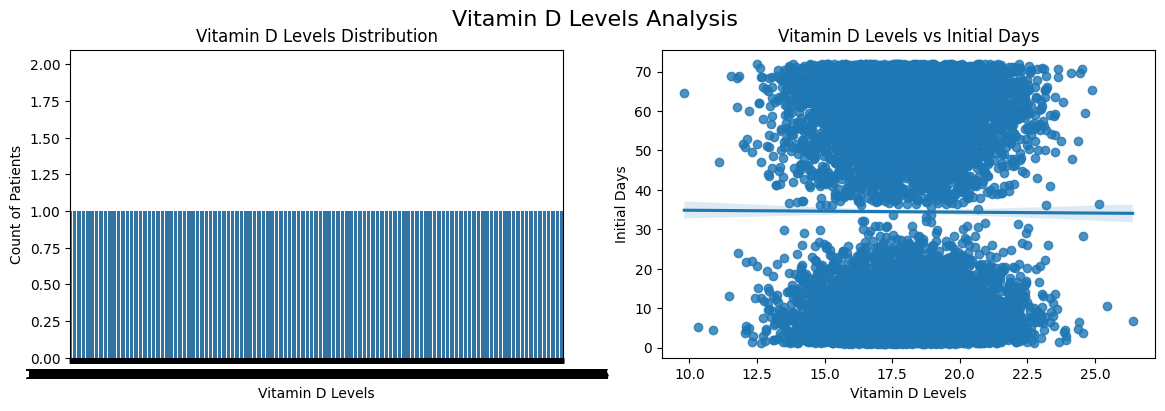

In [54]:
# Vitamin D Levels

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Univariate: Plot the count of each category for Vitamin D Levels
sns.countplot(x='VitD_levels', data=df, ax=axs[0])

# Chart features for Vitamin D Levels distribution
axs[0].set_title('Vitamin D Levels Distribution')
axs[0].set_xlabel('Vitamin D Levels')
axs[0].set_ylabel('Count of Patients')

## Bivariate Analysis ##
sns.regplot(data=df, x='VitD_levels', y='Initial_days', ax=axs[1])

# Chart features for Vitamin D Levels vs Initial_days
axs[1].set_title('Vitamin D Levels vs Initial Days')
axs[1].set_xlabel('Vitamin D Levels')
axs[1].set_ylabel('Initial Days')

# Add a suptitle over both subplots
fig.suptitle('Vitamin D Levels Analysis', fontsize=16)

# Adjust layout with more padding
plt.subplots_adjust(wspace=0.2) 

# Show the plots
plt.show()

### C4. Data Transformation Goals

Most of the required data transformation took place in the data cleaning step. 
- Convert boolean values from T/F to 1 or 0
    - Already completed in the data cleaning step by using mapping to map True to 1 and False to 0 
- Use one hot encoding to take categorical variables and convert them in to a numerical variable acceptable for MLR
    - MLR is not necessarily compatible with categorical variables
    - One hot encoding takes a categorical variable and splits it in to multiple boolean columns
    - One variable is dropped to avoid multicollinearity
    - Process:
        - The Pandas "get_dummies" function will be used to split the categorical variables (3 in total)
        - Loops will be used for each categorical variable to automatically assign colunn names and add columns to the dataframe
        - Convert any created boolean columns to integers
- Create a copy of the dataframe for MLR to preserve the original dataframe

Source from [Python Pandas – get_dummies() method](https://www.geeksforgeeks.org/python-pandas-get_dummies-method/)

In [55]:
## Create dummy variables
complication_risk_dummy = pd.get_dummies(data=df["Complication_risk"], drop_first=True)
gender_dummy = pd.get_dummies(data=df["Gender"], drop_first=True)
initial_admin_dummy = pd.get_dummies(data=df["Initial_admin"], drop_first=True)

# Convert the list of columns to a DataFrame
base_columns = ["Age", "Allergic_rhinitis", "Arthritis", "Asthma", "BackPain", 
                "Children", "Diabetes", "Doc_visits", "HighBlood", "Hyperlipidemia", 
                "Income", "Initial_days", "Overweight", "Reflux_esophagitis", 
                "Soft_drink", "Stroke", "vitD_supp", "VitD_levels"]

# Create the DataFrame
rdf = df[base_columns].copy()

# Add dummy variables
for col in complication_risk_dummy.columns:
    rdf[f'Complication_risk_{col}'] = complication_risk_dummy[col]
for col in gender_dummy.columns:
    rdf[f'Gender_{col}'] = gender_dummy[col]
for col in initial_admin_dummy.columns:
    rdf[f'Initial_Admin_{col}'] = initial_admin_dummy[col]

# Convert boolean columns to integers (after adding all dummy variables)
bool_columns = rdf.select_dtypes(include='bool').columns
rdf[bool_columns] = rdf[bool_columns].astype(int)

print("\nFinal DataFrame shape:", rdf.shape)
print("\nColumns in final DataFrame:")
print(rdf.columns.tolist())


Final DataFrame shape: (10000, 24)

Columns in final DataFrame:
['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 'Children', 'Diabetes', 'Doc_visits', 'HighBlood', 'Hyperlipidemia', 'Income', 'Initial_days', 'Overweight', 'Reflux_esophagitis', 'Soft_drink', 'Stroke', 'vitD_supp', 'VitD_levels', 'Complication_risk_Low', 'Complication_risk_Medium', 'Gender_Male', 'Gender_Nonbinary', 'Initial_Admin_Emergency Admission', 'Initial_Admin_Observation Admission']


### C5. Prepared Data Set

In [56]:
# Write DataFrame to CSV
rdf.to_csv('prepared_data.csv', index=False)

## Part IV: Model Comparison and Analysis

### D1. Initial Model

In [57]:
# Get independent variables
X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'Diabetes', 'Doc_visits', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 'Soft_drink', 'Stroke', 
         'vitD_supp', 'VitD_levels', 'Complication_risk_Low', 
         'Complication_risk_Medium', 'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission', 
         'Initial_Admin_Observation Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.304
Date:                Sat, 09 Nov 2024   Prob (F-statistic):              0.150
Time:                        12:37:42   Log-Likelihood:                -46873.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9976   BIC:                         9.397e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### D2. Justification of Model Reduction

The output of the initial regression model results indicate that there is strong multicollinearity. Since one assumption of MLR is that there is no multicollinearity, the model must be reduced to show little to no signs of multicollinearity. Variance Inflation Factor (VIF) is the method in which the model will initially be reduced. VIF is a statistical tool used to determine if multicollinearity exists in a regression model (CFA Institute, 2024). The results of VIF will highlight which variables are contributing to multicollinearity and removal can be decided based off of that.

After successfully removing variables with VIF over 10, backwards stepwise elimination will be used to further reduce the model. Backward stepwise elimination is a process in which non-significant predictor variables are removed until a desired stopping point is reached (Ravelo, 2022). The process involves running MLR and removing a single variable at a time. The p-value is the reference used for statistical significance. In this analysis, the stopping point for backwards stepwise elimination will be when all predictor variables are marginally significant, in this case a p-value less than 0.10. A p-value of 0.10 was determined by tests of backwards stepwise elimination. As you will see further on in this analysis, there are very few statistically significant variables (p-value less than 0.05), so choosing p-value of 0.10 as the marginally significant threshold allowed a balance between removing too many predicting variables from the model (reducing practical application) and having significant variables. 

VIF code sourced from: [Detecting Multicollinearity with VIF – Python](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)

Backwards Stepwise Elimination code sourced from: [Ordinary Least Squares](https://www.statsmodels.org/0.6.1/examples/notebooks/generated/ols.html)

In [58]:
# VIF 1

# Get our predictor variables and make an explicit copy
X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'Diabetes', 'Doc_visits', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 'Soft_drink', 'Stroke', 
         'vitD_supp', 'VitD_levels', 'Complication_risk_Low', 
         'Complication_risk_Medium', 'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission', 
         'Initial_Admin_Observation Admission']].copy()


# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF value in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Print results
print(vif_data)

                               Variable        VIF
16                          VitD_levels  30.291887
7                            Doc_visits  19.913214
0                                   Age   7.358139
11                           Overweight   3.391440
21    Initial_Admin_Emergency Admission   2.981039
10                               Income   2.968404
18             Complication_risk_Medium   2.320865
22  Initial_Admin_Observation Admission   1.953004
19                          Gender_Male   1.932439
5                              Children   1.931067
4                              BackPain   1.696552
12                   Reflux_esophagitis   1.693704
8                             HighBlood   1.690045
1                     Allergic_rhinitis   1.644775
17                Complication_risk_Low   1.618685
2                             Arthritis   1.553849
9                        Hyperlipidemia   1.503800
3                                Asthma   1.405974
15                            v

The initial VIF calculation resulted in VitD_levels with a VIF of 30.29. Next step is to remove VitD_levels and run VIF again.

In [59]:
# VIF 2 - after removing VitD_levels

# Get our predictor variables and make an explicit copy
X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'Diabetes', 'Doc_visits', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 'Soft_drink', 'Stroke', 
         'vitD_supp', 'Complication_risk_Low', 
         'Complication_risk_Medium', 'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission', 
         'Initial_Admin_Observation Admission']].copy()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF value in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Print results
print(vif_data)

                               Variable        VIF
7                            Doc_visits  12.629616
0                                   Age   6.645508
11                           Overweight   3.276313
10                               Income   2.898363
20    Initial_Admin_Emergency Admission   2.858582
17             Complication_risk_Medium   2.263090
21  Initial_Admin_Observation Admission   1.905054
18                          Gender_Male   1.904869
5                              Children   1.904584
4                              BackPain   1.687543
8                             HighBlood   1.677886
12                   Reflux_esophagitis   1.676783
1                     Allergic_rhinitis   1.631208
16                Complication_risk_Low   1.593700
2                             Arthritis   1.543868
9                        Hyperlipidemia   1.493281
3                                Asthma   1.397439
15                            vitD_supp   1.393827
6                              

The VIF for Doc_visits decreased after removing VitD_levels, but it is still over 10. Doc_visits will be removed for a third VIF run.

In [60]:
# Vif 3 - after removing VitD_Levels and Doc_visits

# Get our predictor variables and make an explicit copy
X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'Diabetes', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 'Soft_drink', 'Stroke', 
         'vitD_supp', 'Complication_risk_Low', 
         'Complication_risk_Medium', 'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission', 
         'Initial_Admin_Observation Admission']].copy()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF value in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Print results
print(vif_data)

                               Variable       VIF
0                                   Age  5.599445
10                           Overweight  3.093882
9                                Income  2.762976
19    Initial_Admin_Emergency Admission  2.673373
16             Complication_risk_Medium  2.198027
5                              Children  1.871950
17                          Gender_Male  1.864008
20  Initial_Admin_Observation Admission  1.812219
4                              BackPain  1.668428
7                             HighBlood  1.657416
11                   Reflux_esophagitis  1.650910
1                     Allergic_rhinitis  1.608701
15                Complication_risk_Low  1.563197
2                             Arthritis  1.529649
8                        Hyperlipidemia  1.485627
3                                Asthma  1.391689
14                            vitD_supp  1.379852
6                              Diabetes  1.359171
12                           Soft_drink  1.332031


The third pass at VIF now shows all variables under a VIF of 10, with the highest being Age at 5.599.

Next, backward elimination will be used to further reduce the model. 

In [61]:
# Backwards stepwise elimination 1
# Eliminated: vitD_Levels, Doc_visits

X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Diabetes', 'HighBlood', 'Hyperlipidemia', 
         'Overweight', 'Reflux_esophagitis', 'Soft_drink', 'Stroke', 
         'vitD_supp', 'Complication_risk_Low', 
         'Complication_risk_Medium', 'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission', 
         'Initial_Admin_Observation Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.193
Date:                Sat, 09 Nov 2024   Prob (F-statistic):              0.253
Time:                        12:37:42   Log-Likelihood:                -46877.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9980   BIC:                         9.394e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

The MLR output still gives a warning for multicollinearity. However, the condition number has decreased from the initial model so removing the VitD_levels and Doc_visits has the model on the right path.

Since the Complication_risk_Medium variable is one of the least significant values (highest p-value), it is next to be removed from the model.

In [62]:
# Backwards stepwise elimination 2
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium

X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'Diabetes', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 'Soft_drink', 'Stroke', 
         'vitD_supp', 'Complication_risk_Low', 
         'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission', 
         'Initial_Admin_Observation Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.472
Date:                Sat, 09 Nov 2024   Prob (F-statistic):             0.0796
Time:                        12:37:42   Log-Likelihood:                -46873.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9979   BIC:                         9.394e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Stroke is next to be removed from the model due to a high p-evalue of 0.830.

In [63]:
# Backwards stepwise elimination 3
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke

X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'Diabetes', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 'Soft_drink', 
         'vitD_supp', 'Complication_risk_Low', 
         'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission', 
         'Initial_Admin_Observation Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.548
Date:                Sat, 09 Nov 2024   Prob (F-statistic):             0.0601
Time:                        12:37:43   Log-Likelihood:                -46873.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9980   BIC:                         9.393e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Diabetes is next to be removed from the model due to a high p-evalue of 0.777.

In [64]:
# Backwards stepwise elimination 4
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes

X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 'Soft_drink', 
         'vitD_supp', 'Complication_risk_Low', 
         'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission', 
         'Initial_Admin_Observation Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.629
Date:                Sat, 09 Nov 2024   Prob (F-statistic):             0.0447
Time:                        12:37:43   Log-Likelihood:                -46873.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9981   BIC:                         9.392e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Soft_drink is next to be removed from the model due to a high p-evalue of 0.770.

In [65]:
# Backwards stepwise elimination 5
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink

X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 
         'vitD_supp', 'Complication_risk_Low', 
         'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission', 
         'Initial_Admin_Observation Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.720
Date:                Sat, 09 Nov 2024   Prob (F-statistic):             0.0325
Time:                        12:37:43   Log-Likelihood:                -46873.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9982   BIC:                         9.391e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Initial_Admin_Observation Admission is next to be removed from the model due to a high p-evalue of 0.750.

In [66]:
# Backwards stepwise elimination 6
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission

X = rdf[['Age', 'Allergic_rhinitis', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 
         'vitD_supp', 'Complication_risk_Low', 
         'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.822
Date:                Sat, 09 Nov 2024   Prob (F-statistic):             0.0231
Time:                        12:37:43   Log-Likelihood:                -46874.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9983   BIC:                         9.390e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Allergic_rhinitis is next to be removed from the model due to a high p-evalue of 0.722.

In [67]:
# Backwards stepwise elimination 7
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis

X = rdf[['Age', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'HighBlood', 'Hyperlipidemia', 
         'Income', 'Overweight', 'Reflux_esophagitis', 
         'vitD_supp', 'Complication_risk_Low', 
         'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.935
Date:                Sat, 09 Nov 2024   Prob (F-statistic):             0.0161
Time:                        12:37:43   Log-Likelihood:                -46874.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9984   BIC:                         9.389e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Hyperlipidemia is next to be removed from the model due to a high p-evalue of 0.689.

In [68]:
# Backwards stepwise elimination 8
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia

X = rdf[['Age', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'HighBlood', 
         'Income', 'Overweight', 'Reflux_esophagitis', 
         'vitD_supp', 'Complication_risk_Low', 
         'Gender_Male', 'Gender_Nonbinary',
         'Initial_Admin_Emergency Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.062
Date:                Sat, 09 Nov 2024   Prob (F-statistic):             0.0110
Time:                        12:37:43   Log-Likelihood:                -46874.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9985   BIC:                         9.389e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Gender_Nonbinary is next to be removed from the model due to a high p-evalue of 0.613.

In [69]:
# Backwards stepwise elimination 9
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary

X = rdf[['Age', 'Arthritis', 'Asthma', 'BackPain', 
         'Children', 'HighBlood', 
         'Income', 'Overweight', 'Reflux_esophagitis', 
         'vitD_supp', 'Complication_risk_Low', 
         'Gender_Male',
         'Initial_Admin_Emergency Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.201
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00750
Time:                        12:37:43   Log-Likelihood:                -46874.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9986   BIC:                         9.388e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

HighBlood is next to be removed from the model due to a high p-evalue of 0.551.

In [70]:
# Backwards stepwise elimination 10
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood

X = rdf[['Age', 'Arthritis', 'Asthma', 'BackPain', 
         'Children',
         'Income', 'Overweight', 'Reflux_esophagitis', 
         'vitD_supp', 'Complication_risk_Low', 
         'Gender_Male',
         'Initial_Admin_Emergency Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.355
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00512
Time:                        12:37:43   Log-Likelihood:                -46874.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9987   BIC:                         9.387e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Gender_Male is next to be removed from the model due to a high p-evalue of 0.471.

In [71]:
# Backwards stepwise elimination 11
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male

X = rdf[['Age', 'Arthritis', 'Asthma', 'BackPain', 
         'Children',
         'Income', 'Overweight', 'Reflux_esophagitis', 
         'vitD_supp', 'Complication_risk_Low', 
         'Initial_Admin_Emergency Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.521
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00358
Time:                        12:37:43   Log-Likelihood:                -46874.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9988   BIC:                         9.386e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Overweight is next to be removed from the model due to a high p-evalue of 0.286.

In [72]:
# Backwards stepwise elimination 12
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male, Overweight

X = rdf[['Age', 'Arthritis', 'Asthma', 'BackPain', 
         'Children',
         'Income', 'Reflux_esophagitis', 
         'vitD_supp', 'Complication_risk_Low', 
         'Initial_Admin_Emergency Admission']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.660
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00304
Time:                        12:37:43   Log-Likelihood:                -46875.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9989   BIC:                         9.385e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Initial_Admin_Emergency Admission is next to be removed from the model due to a high p-evalue of 0.231.

In [73]:
# Backwards stepwise elimination 13
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male, Overweight, Initial_Admin_Emergency Admission

X = rdf[['Age', 'Arthritis', 'Asthma', 'BackPain', 
         'Children',
         'Income', 'Reflux_esophagitis', 
         'vitD_supp', 'Complication_risk_Low']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.796
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00282
Time:                        12:37:43   Log-Likelihood:                -46876.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9990   BIC:                         9.384e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    31.98

Reflux_esophagitis is next to be removed from the model due to a high p-evalue of 0.225.

In [74]:
# Backwards stepwise elimination 14
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male, Overweight, Initial_Admin_Emergency Admission, Reflux_esophagitis

X = rdf[['Age', 'Arthritis', 'Asthma', 'BackPain', 
         'Children',
         'Income',
         'vitD_supp', 'Complication_risk_Low']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.961
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00260
Time:                        12:37:43   Log-Likelihood:                -46876.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9991   BIC:                         9.384e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    32.25

Income is next to be removed from the model due to a high p-evalue of 0.209.

In [75]:
# Backwards stepwise elimination 15
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male, Overweight, Initial_Admin_Emergency Admission, Reflux_esophagitis,
#             Income  

X = rdf[['Age', 'Arthritis', 'Asthma', 'BackPain', 
         'Children',
         'vitD_supp', 'Complication_risk_Low']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.159
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00245
Time:                        12:37:43   Log-Likelihood:                -46877.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9992   BIC:                         9.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    31.77

Asthma is next to be removed from the model due to a high p-evalue of 0.176.

In [76]:
# Backwards stepwise elimination 16
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male, Overweight, Initial_Admin_Emergency Admission, Reflux_esophagitis,
#             Income, Asthma

X = rdf[['Age', 'Arthritis', 'BackPain', 
         'Children',
         'vitD_supp', 'Complication_risk_Low']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.379
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00249
Time:                        12:37:43   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9993   BIC:                         9.382e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    31.55

Age is next to be removed from the model due to a high p-evalue of 0.124.

In [77]:
# Backwards stepwise elimination 17
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male, Overweight, Initial_Admin_Emergency Admission, Reflux_esophagitis,
#             Income, Asthma, Age

X = rdf[['Arthritis', 'BackPain', 
         'Children',
         'vitD_supp', 'Complication_risk_Low']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.582
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00308
Time:                        12:37:43   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9994   BIC:                         9.381e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    32.59

vitD_supp is next to be removed from the model due to a high p-evalue of 0.102.

In [78]:
# Backwards stepwise elimination 18
# Eliminated: vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, 
#             Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male, Overweight, Initial_Admin_Emergency Admission, Reflux_esophagitis,
#             Income, Asthma, Age, vitD_supp

X = rdf[['Arthritis', 'BackPain', 
         'Children',
         'Complication_risk_Low']].copy()

# Add constant
X = sm.add_constant(X)

# Get target variable
y = rdf['Initial_days']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.808
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00426
Time:                        12:37:43   Log-Likelihood:                -46881.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9995   BIC:                         9.381e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    32.87

After having eliminated vitD_Levels, Doc_visits, Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male, Overweight, Initial_Admin_Emergency Admission, Reflux_esophagitis, Income, Asthma, Age, and vitD_supp the model no longer shows an error for multicollinearity. There is also greater statistical significance amongst all variables.

### E1. Model Comparison

The initial model started with the following variables from the original dataset: Age, Allergic_rhinitis, Arthritis, Asthma, BackPain, Children, Diabetes, Doc_visits, HighBlood, Hyperlipidemia, Income, Overweight, Reflux_esophagitis, Soft_drink, Stroke, vitD_supp, and VitD_levels. The following categorical variables were added to the initial model by using one hot encoding: Complication_risk_Low, Complication_risk_Medium, Gender_Male, Gender_Nonbinary, Initial_Admin_Emergency Admission, and Initial_Admin_Observation Admission. Initial_days was of course the dependent variable.


Upon running MLR, the model was identified as having high multicollinearity and contained several variables with low statistical significance. Variance Inflation Factor (VIF) identified VitD_levels and Doc_visits as the variables with high multicollinearity. Those variables were removed in the reduced models. Next, Backwards Stepwise Elimination was used to further reduce the model. The following variables were removed after 18 iterations of backwards stepwise elimination: Complication_risk_Medium, Stroke, Diabetes, Soft_drink, Initial_Admin_Observation Admission, Allergic_rhinitis, Hyperlipidemia, Gender_Nonbinary, HighBlood, Gender_Male, Overweight, Initial_Admin_Emergency Admission, Reflux_esophagitis, Income, Asthma, Age, and vitD_supp. The model reduction was complete after all variables within the model were marginally statistic (p-value < 0.10) as previously determined in the model reduction justification.

A popular way of evaluating models is by analyzing the coefficient of determination (r-squared). R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables (Model Evaluation: Evaluating MLR Models: A Comprehensive Guide - FasterCapital, 2024). A value of 0 would indicate the independent variables do not explain the variance while a value of 1 is a perfect fit. Adjusted r-squared will be used to evaluate the models over simple r-squared as it accounts for a different number of independent variables. The adjusted r-squared for the initial model is 0.001 while the reduced model also has an adjusted r-squared of 0.001. Thus, neither model is strong in explaining the variance in the dependent variable at 0.1%.

Although the adjusted r-squared value is  similiar between the two models, the reduced model is in fact a stronger model. When comparing the F-Statistic to measure statistical significance, the reduced model with an F-Statistic of 3.808 is far superior to the initial model's F-Statistic of 1.304. The reduced model also has more statistically significant variables while the initial model has several variables of very little statistical significance. Overall, the reduced model has better predictive ability than that of the initial model.

### E2. Output and Calculations

Please reference section D model outputs and calculations. 

The following are the residual plots and the residual standard error.
Source for code: [Residual Plot Python](https://www.statology.org/residual-plot-python/)

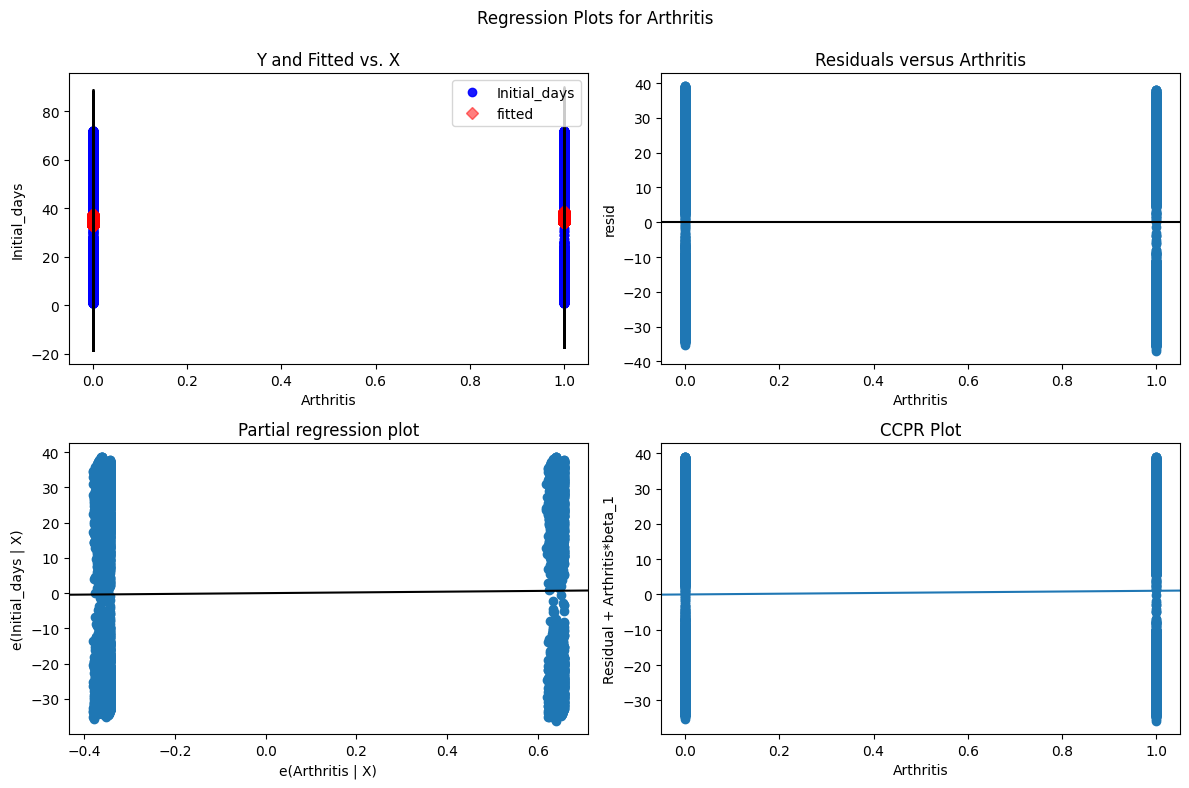

In [79]:
# Arthritis residual plot
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'Arthritis', fig=fig)

There is a small difference in initial_days between people with and without arthritis. It seems arthritis has a small independent effect on initial_days, although it is minimal.

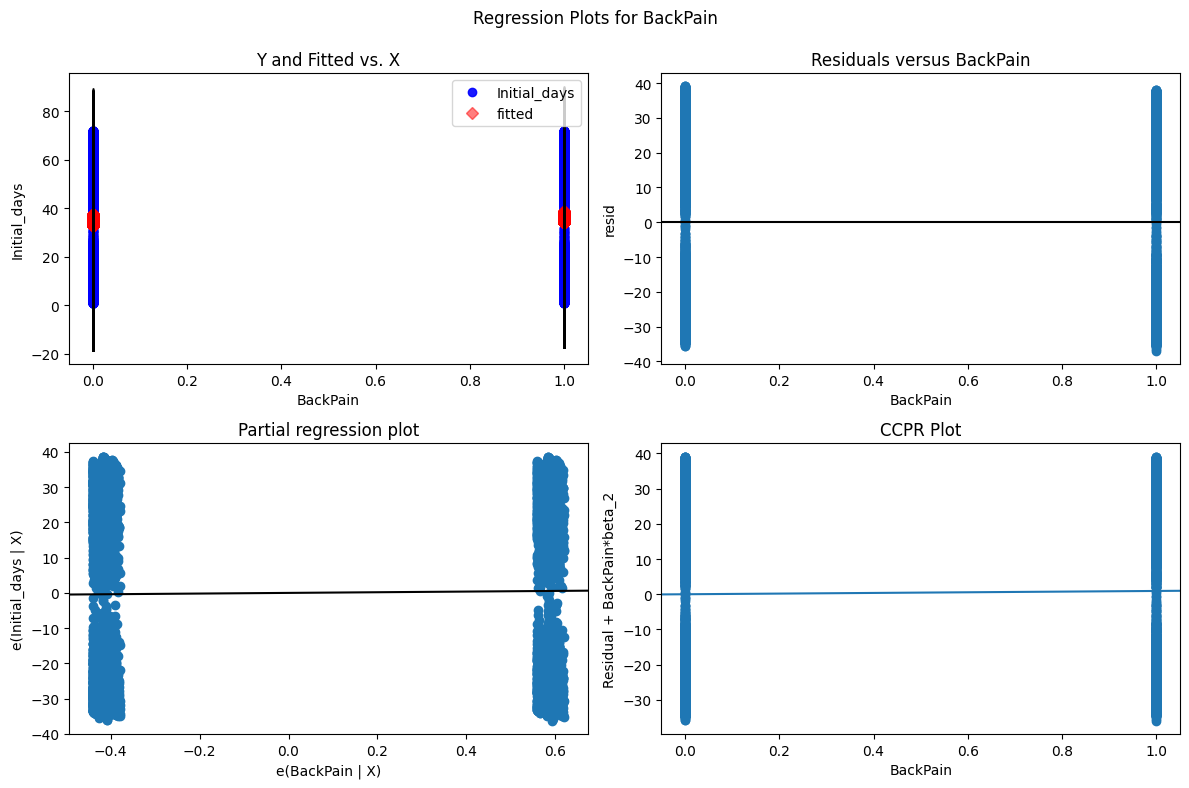

In [80]:
# BackPain residual plot
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'BackPain', fig=fig)

Back pain has minimal independent effect.

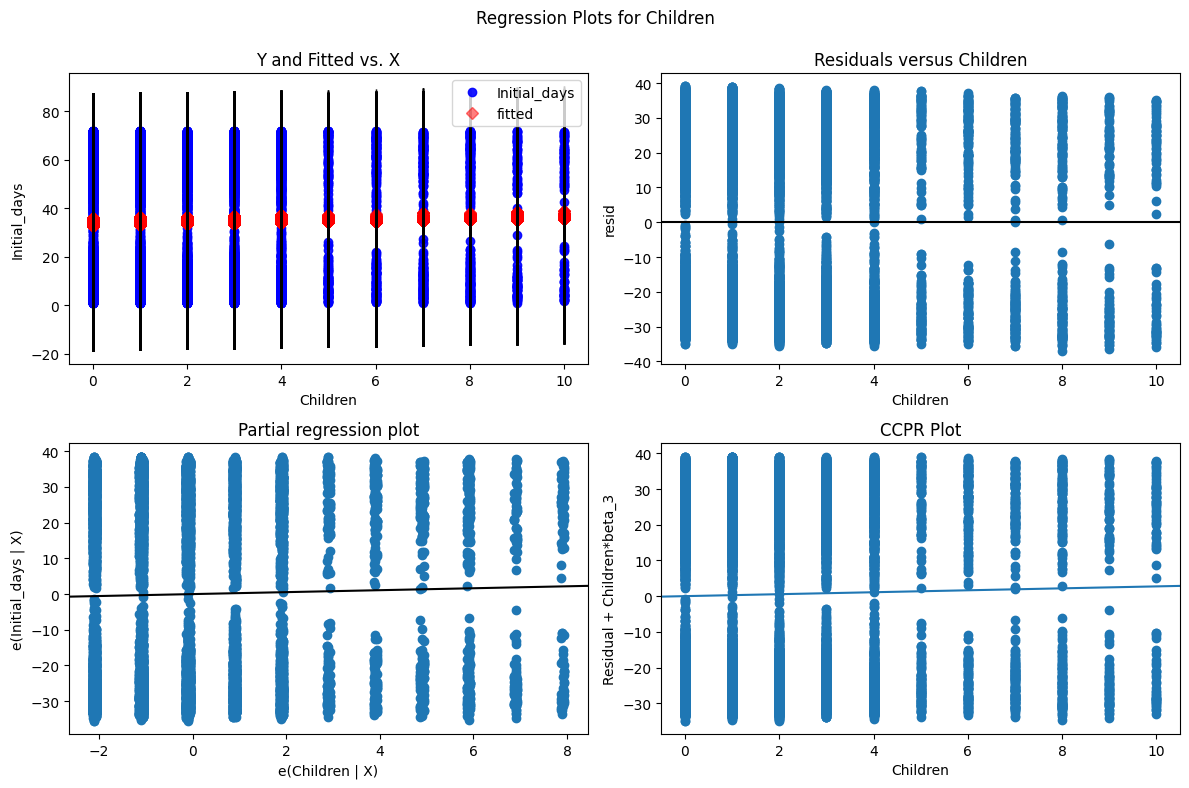

In [81]:
# Children residual plot
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'Children', fig=fig)

The plots suggest having more children might make initial_days slightly longer. Although, the sample size for patients with more children is smaller.

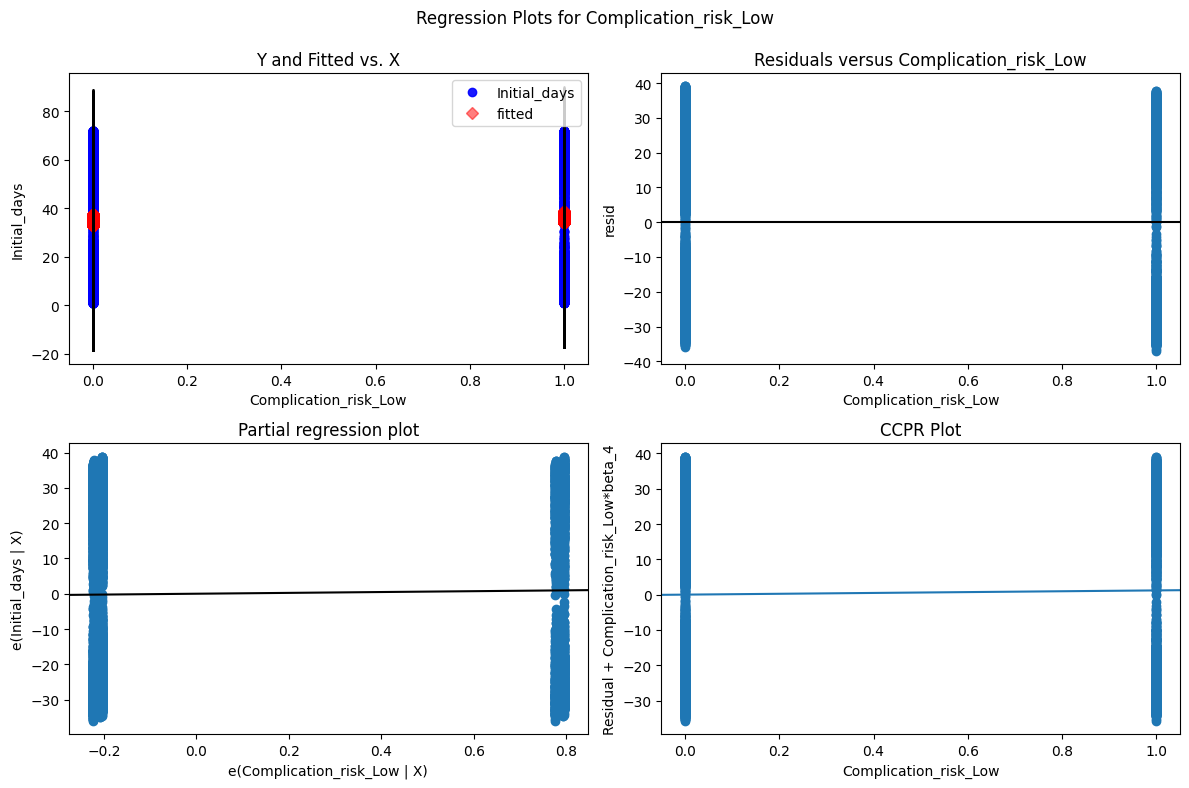

In [82]:
# Complication_risk_Low residual plot
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'Complication_risk_Low', fig=fig)

Complication_risk_Low does not strongly influence Initial_days.

[-0.93338404 -0.70593132 -1.09988274 ...  1.38697402  1.09287129
  1.27706601]


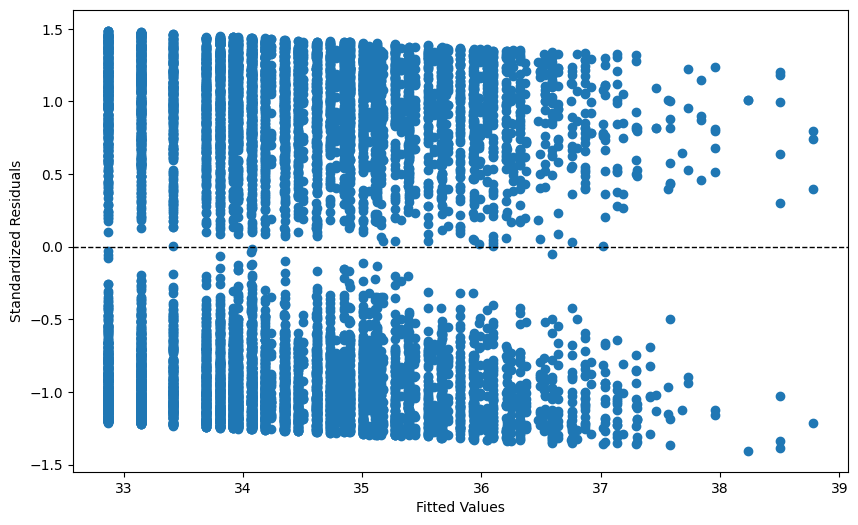

In [83]:
#create instance of influence
influence = results.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

#display standardized residuals
print(standardized_residuals)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

The residual standard error suggests heteroscedasticity.

### E3. Code

The .ipynb file will be included in the submission.

## Part V: Data Summary and Implications

### F1. Results

##### The following is the regression equation for the reduced model: 

$$
\begin{flalign*}
\hat{Y} = & \; 32.8703 - + 0.2730(\text{Children}) + .9360(\text{Back Pain}) + 1.0434(\text{Arthritis}) + 1.1977(\text{Low Complication Risk}) &&
\end{flalign*}
$$

##### Interpreting the coefficients of the reduced model:
- Keeping all things constant, patients with arthritis stay 1.04 days longer compared to patients without arthritis.
- Keeping all things constant, patients with back pain stay 0.94 days longer compared to patients without back pain.
- Keeping all things constant, each additional child a patient has increases stay by 0.27 days.
- Keeping all things constant, patients with low complication risk stay 1.20 days longer compared to those with high complication risk.

##### The statistical and practical significance of the reduced model:
The reduced model is statistically significant. This is determined by analyzing the F-Statistic with p-value where anything with a p-value less than 0.05 is considered statistically significant. This model has a F-Statistic with p-value of 0.00426 - well within the bounds of what is considered statistically significant. We can be confident that these results are not based on chance or luck. 

Looking at the specific variables within the model, only the *children* variable is statistically significant with a p-value of 0.025. This is an interesting because the number of children a patient has is not something one would typically associate with the length of a hospital stay as it is not necessarily medically related. However, based on my experience in health care settings, the people caring for you have a great influence on what kind of treatment you receive - especially for patients in later years of their life. My experience has shown that the more children someone has, the more likely they are to be aggressive with treatment and conservative with risk. An argument could also be made that the number of children one has inflicts additional physical, mental, and emotional stress on the patient requiring greater case. Regardless of the reason, children carries great statistical significance when considering the length of an initial hospital stay. *Arthritis* (p = 0.057), *Back Pain* (p = 0.080), and *Low Complication Risk* (p = 0.063) are considered marginally significant, referencing this analysis' definition of marginally significant being a p-value less than 0.10.

I do not believe that this model is practically significant. While the F Statistic indicates high statistical significance, the coefficient of determination (r-squared / adjusted r-squared) shows that the model only explains 0.1% of the variance. Analyzing the residuals shows a moderate violation in the assumption of linearity, making this a less practical model. VIF seems to indicate little multicollinearity which is encouraging for the model. There could be some slight issues with the independence of observations according to the Durbin-Watson statistic at 0.161. There are issues with normalizty of residuals and homoscedasticity albeit nothing that seems overally egregious.

Aside from applying statistical analysis to this, the variance identified with each of the variables just does not seem like enough to make a great impact on our goal of reducing the number of days spent in the hospital. Ideally for practical use we would want a model that could inform decisions that would reduce the length of stay by days and not mere hours.

##### The limitations of the data analysis:
- The dataset only includes patients over the age of 18. This limits the practical application of the model to be all encompassing.
- The children variable is statistically significant, but the sample size of patients with a greater number of children is far less than that of patients with 0-3 children. Overall, there could be an issue with sampling here and potentially the complexity of health care would require a much larger sample than 10,000 patients.
- In compiling the variables for initial selection for the model, someone who is only semi-knowledgeable in health care is trying to make assumptions on the surface. Partnering with a medical expert who can hypothesize and help draw initial relationships between variables prior to build the model would be of great value.
- The outcome of the initial hospitalization is not documented. There are certain conditions that you could not prevent a patient from coming back or maybe they even died while hospitalized, but if the staff expected the patient to not be readmitted to the hospital for the same condition after they were released - that is the sample we would want to use to build our model.

### F2. Recommendations

Unfortunately, there is not much practical significance to this model. The variable that showed promise, *number of children*, isn't necessarily related to someone's medical condition and is more so a demographic making it more difficult for hospital staff to take action. However, I do believe we have a slight path forward based on two things I hypothesized earlier. One being that the more children one has, the more likely they are to have more aggressive care and take much less risk (insinuating here that they want to be in the hospital longer). Two being that patients with more kids may have more physical, mental, and emotional considerations. Given those two things, I think it is important to first focus on ensuring that not only the patient is informed of treatment and options, but also the support group around them who help make the decisions is well informed.  Second, I would suggest to the hospital chain that we seriously consider performing a research study on linkage between the number of children and one's health. It is possible there is much more to glean than just predicting readmissions - maybe going as far as helping with preventative treatment?

I believe one of the biggest gaps in organizations is the communication between a data team and the front-line staff. Thus, I would recommend partnering with front line staff to determine potentially better initial models to work with. I would start by presenting my findings from this model to get the reaction from the front line staff. This may inspire new ways of thinking about things. I certainly think that there are variables available in the healthcare setting that would supplement these variables and help in developing a better model. A data scientist could do a good job at utilizing those, but who better to partner with than someone who is making the determinations and entering that data?

Finally, I would recommend reducing the scope of the model. It is apparent that people in different stages of life are more prone to suffer from different conditions. Perhaps it would be more effective to model for buckets of age groups, such as 20-40, 40-60, and so on. The variability in conditions may make a blanket model impossible - unless you have hundreds of potential variables to work with. In essence, the recommendation here is to collect more data and ensure the goals for the model are realistic.

## Part VI: Demonstration

### G. Panopto Recording

Attached to submission. Includes:
- an identification of the version of the programming environment
- a comparison of the initial multiple linear regression model you used and the reduced linear regression model you used in your analysis
- an interpretation of the coefficients of the reduced model

### H. Sources of Third-Party Code

Bobbitt, Zach. (2020, July 21). How to Create a Residual Plot in Python. Statology. https://www.statology.org/residual-plot-python/

Detecting Multicollinearity with VIF - Python. (2020, August 14). GeeksforGeeks. https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

Ordinary Least Squares — statsmodels 0.6.1 documentation. (n.d.). Www.statsmodels.org. https://www.statsmodels.org/0.6.1/examples/notebooks/generated/ols.html

Python Pandas - get_dummies() method. (2020, July 28). GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-get_dummies-method/

stikpet. (2022, July 13). Python - Creating Bins (bucketing). YouTube. https://www.youtube.com/watch?v=I83PNH0JRMA



### I. Sources

CFA Institute. (2024). Basics of Multiple Regression and Underlying Assumptions. Retrieved from https://www.cfainstitute.org

Dataaspirant. (2023). Learn How Multiple Linear Regression Works In Minutes. Retrieved from https://www.dataaspirant.com

Model evaluation: Evaluating MLR Models: A Comprehensive Guide - FasterCapital. (2024). FasterCapital. https://fastercapital.com/content/Model-evaluation--Evaluating-MLR-Models--A-Comprehensive-Guide.html

Ravelo, C. (2022, September 16). Stepwise Regression: What is it and should you use it? -. Statistics Solutions. https://www.statisticssolutions.com/stepwise-regression-what-is-it-and-should-you-use-it/

Statology. (2023). The Five Assumptions of Multiple Linear Regression. Retrieved from https://www.statology.org

Statistics Solutions. (2023). Assumptions of Multiple Linear Regression. https://www.statisticssolutions.com